In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


<h1>Load Data from Drive</h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/dataset.csv')
data

id  gender   age  hypertension  heart_disease ever_married  \
0      30669    Male   3.0             0              0           No   
1      30468    Male  58.0             1              0          Yes   
2      16523  Female   8.0             0              0           No   
3      56543  Female  70.0             0              0          Yes   
4      46136    Male  14.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          children          Rural              95.12  18.0              NaN   
1           Private          Urban              87.96  39.2     never smoked   
2           Private          Urban             110.89  17.6              NaN   
3           Private          Rural              69.04  35.9  formerly smoked   
4      Never_worked          Rural             161.28  19.1              NaN   
...             ...            ...                ...   ...              ...   
43395      children          Urban              58.64  20.4     never smoked   
43396      Govt_job          Urban             213.61  55.4  formerly smoked   
43397       Private          Urban              91.94  28.9  formerly smoked   
43398       Private          Urban              99.16  33.2     never smoked   
43399       Private          Urban              79.48  20.6     never smoked   

       stroke  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
43395       0  
43396       0  
43397       0  
43398       0  
43399       0  

[43400 rows x 12 columns]

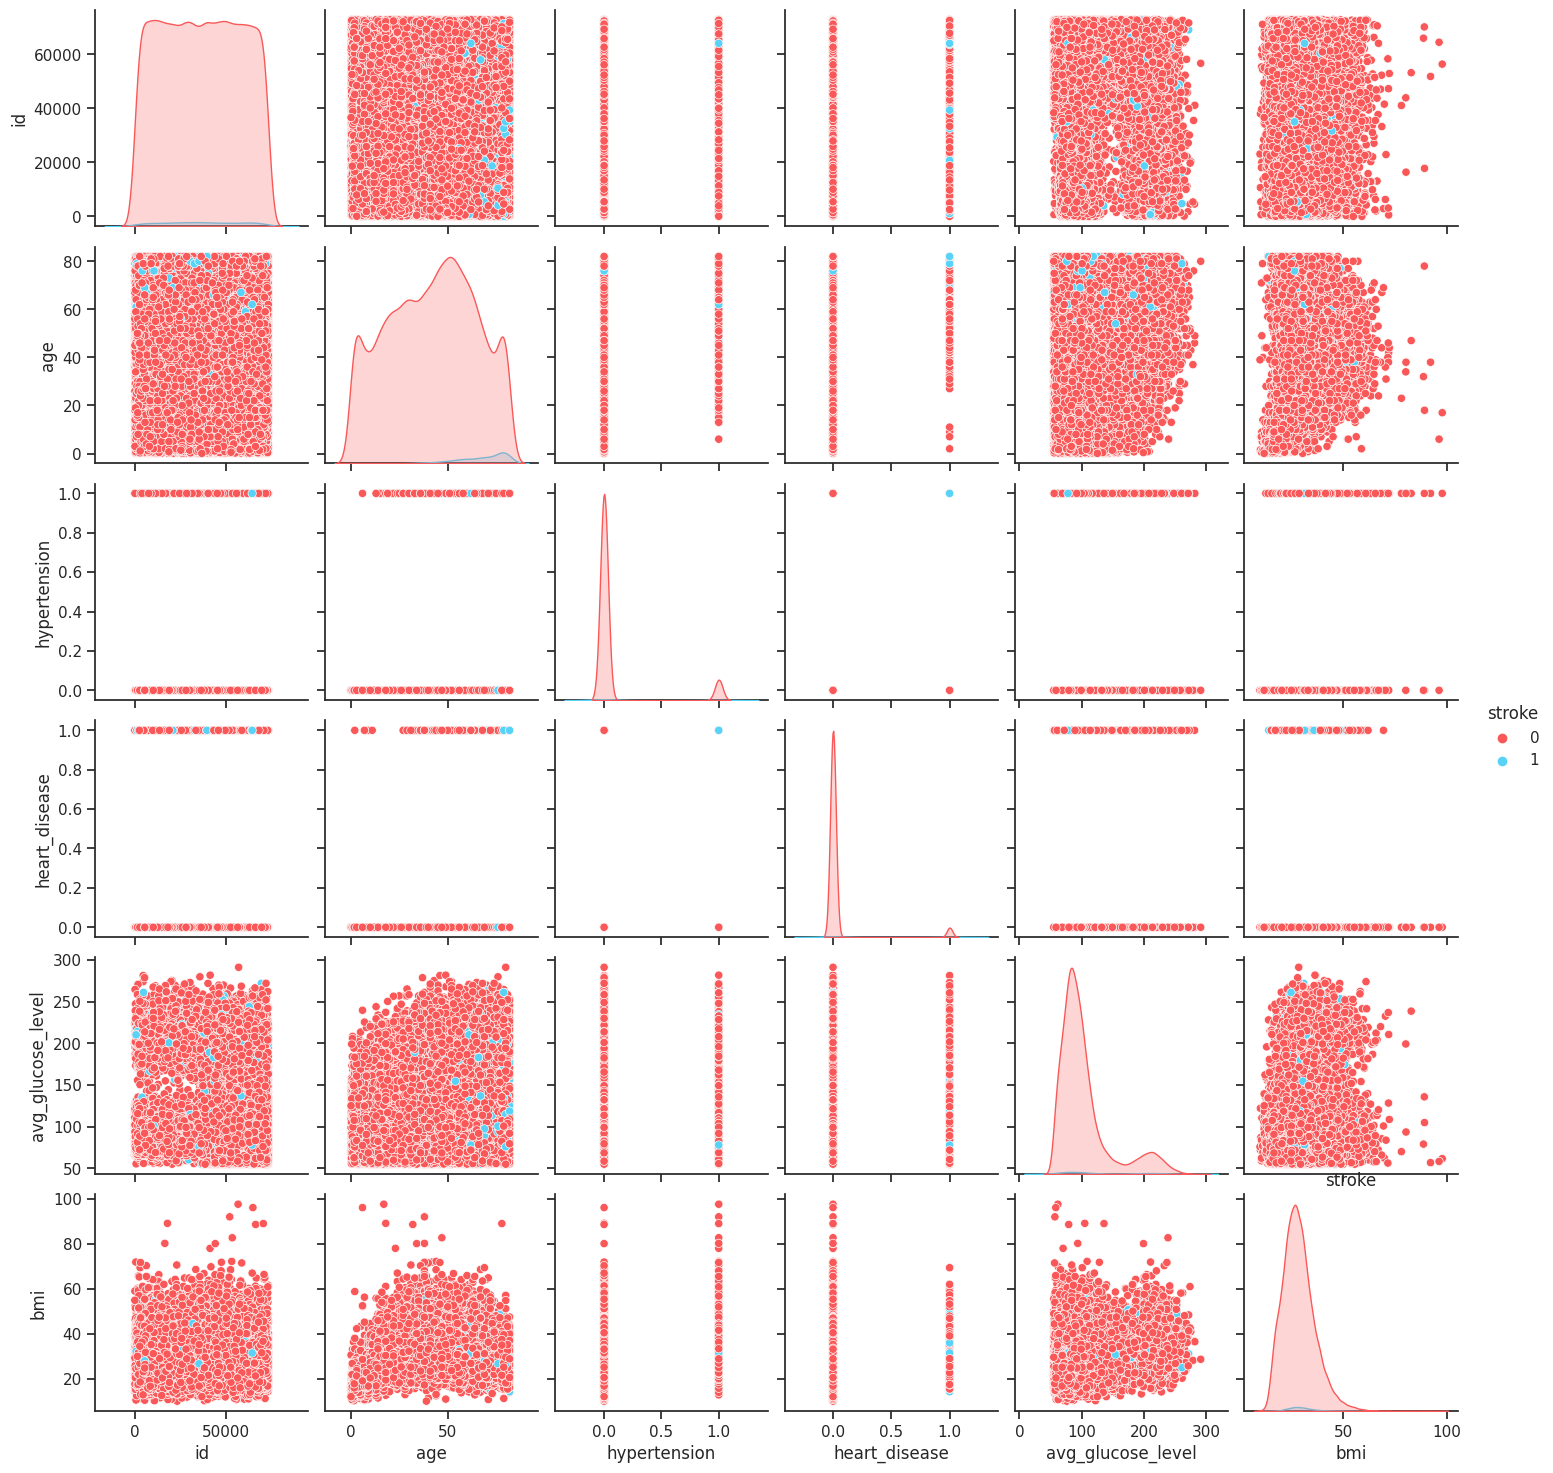

In [4]:
sns.set(style="ticks");
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(data, hue="stroke", palette=pal);
plt.title("stroke");

<h1>Data Imputation</h1>

In [ ]:
data.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
# Using mean to replace bmi
data.bmi.replace(to_replace=np.nan, value=data.bmi.mean(), inplace=True)

In [ ]:
# Replace unknown for smoking status
data['smoking_status'].fillna('unknown', inplace=True)

In [ ]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Drop unused id
data = data.drop(['id'], axis=1)
data

gender   age  hypertension  heart_disease ever_married     work_type  \
0        Male   3.0             0              0           No      children   
1        Male  58.0             1              0          Yes       Private   
2      Female   8.0             0              0           No       Private   
3      Female  70.0             0              0          Yes       Private   
4        Male  14.0             0              0           No  Never_worked   
...       ...   ...           ...            ...          ...           ...   
43395  Female  10.0             0              0           No      children   
43396  Female  56.0             0              0          Yes      Govt_job   
43397  Female  82.0             1              0          Yes       Private   
43398    Male  40.0             0              0          Yes       Private   
43399  Female  82.0             0              0          Yes       Private   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0              Rural              95.12  18.0          unknown       0  
1              Urban              87.96  39.2     never smoked       0  
2              Urban             110.89  17.6          unknown       0  
3              Rural              69.04  35.9  formerly smoked       0  
4              Rural             161.28  19.1          unknown       0  
...              ...                ...   ...              ...     ...  
43395          Urban              58.64  20.4     never smoked       0  
43396          Urban             213.61  55.4  formerly smoked       0  
43397          Urban              91.94  28.9  formerly smoked       0  
43398          Urban              99.16  33.2     never smoked       0  
43399          Urban              79.48  20.6     never smoked       0  

[43400 rows x 11 columns]

<h1>Label Encoding</h1>

In [ ]:
cat_maps = {'work_type': {'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4},
            'gender': {'Male':0, 'Female':1, 'Other':2},
            'Residence_type': {'Urban':0, 'Rural':1},
            'smoking_status': {'formerly smoked':0, 'never smoked':1, 'smokes':2, 'unknown':3},
            'ever_married': {'Yes':0, 'No':1}
}

In [ ]:
data['work_type'] = data['work_type'].map(cat_maps['work_type'])
data['gender'] = data['gender'].map(cat_maps['gender'])
data['Residence_type'] = data['Residence_type'].map(cat_maps['Residence_type'])
data['smoking_status'] = data['smoking_status'].map(cat_maps['smoking_status'])
data['ever_married'] = data['ever_married'].map(cat_maps['ever_married'])

In [ ]:
data['gender'] = data['gender'].astype(int)

<h1>Outlier Removal</h1>

<Axes: >

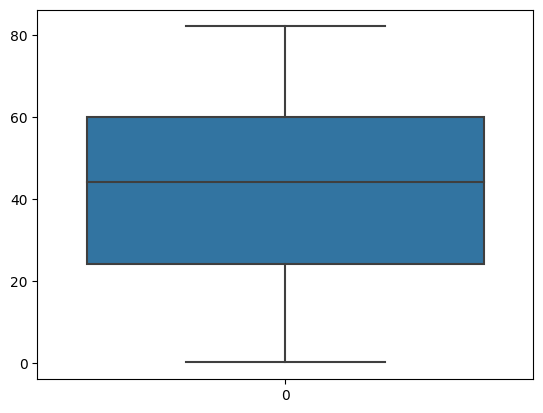

In [ ]:
sns.boxplot(data['age'])

<Axes: >

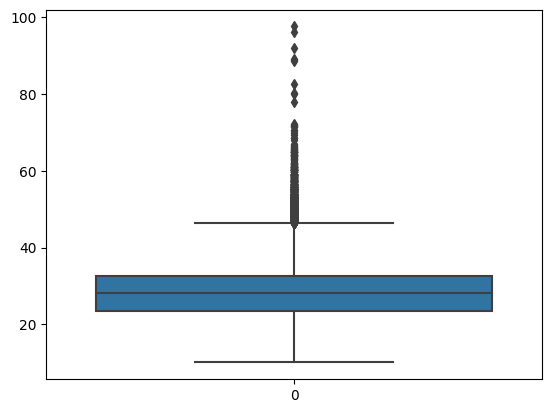

In [ ]:
sns.boxplot(data['bmi'])

<Axes: >

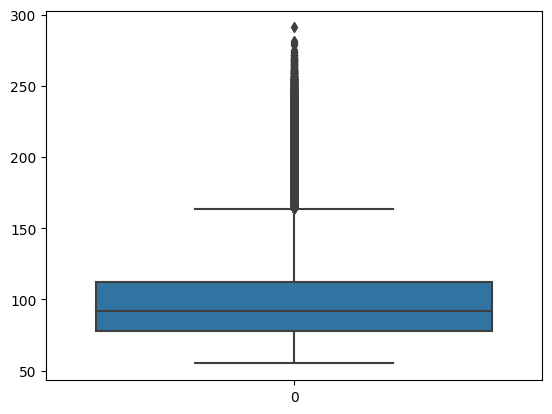

In [ ]:
sns.boxplot(data['avg_glucose_level'])

In [ ]:
import pandas as pd
Q1_BMI = data['bmi'].quantile(0.25)
Q3_BMI = data['bmi'].quantile(0.75)
IQR_BMI = Q3_BMI - Q1_BMI

In [ ]:
k = 1.5
lower_threshold_BMI = Q1_BMI - k * IQR_BMI
upper_threshold_BMI = Q3_BMI + k * IQR_BMI

print(lower_threshold_BMI)
print(upper_threshold_BMI)

9.599999999999994
46.400000000000006


In [ ]:
Q1_agl = data['avg_glucose_level'].quantile(0.25)
Q3_agl = data['avg_glucose_level'].quantile(0.75)
IQR_agl = Q3_agl - Q1_agl

In [ ]:
k = 1.5
lower_threshold_agl = Q1_agl - k * IQR_agl
upper_threshold_agl = Q3_agl + k * IQR_agl

print(lower_threshold_agl)
print(upper_threshold_agl)

25.745000000000026
163.86499999999998


In [ ]:
outliers_count_BMI = ((data['bmi'] < lower_threshold_BMI) | (data['bmi'] > upper_threshold_BMI)).sum()
print("Number of outliers in 'BMI' variable:", outliers_count_BMI)

Number of outliers in 'BMI' variable: 1084


In [ ]:
outlier_indices_BMI = data[(data['bmi'] < lower_threshold_BMI) | (data['bmi'] > upper_threshold_BMI)].index

In [ ]:
data = data.drop(outlier_indices_BMI)

In [ ]:
data

gender   age  hypertension  heart_disease  ever_married  work_type  \
0           0   3.0             0              0             1          3   
1           0  58.0             1              0             0          0   
2           1   8.0             0              0             1          0   
3           1  70.0             0              0             0          0   
4           0  14.0             0              0             1          4   
...       ...   ...           ...            ...           ...        ...   
43394       0  47.0             0              0             1          2   
43395       1  10.0             0              0             1          3   
43397       1  82.0             1              0             0          0   
43398       0  40.0             0              0             0          0   
43399       1  82.0             0              0             0          0   

       Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                   1              95.12  18.0               3       0  
1                   0              87.96  39.2               1       0  
2                   0             110.89  17.6               3       0  
3                   1              69.04  35.9               0       0  
4                   1             161.28  19.1               3       0  
...               ...                ...   ...             ...     ...  
43394               0              68.52  25.2               0       0  
43395               0              58.64  20.4               1       0  
43397               0              91.94  28.9               0       0  
43398               0              99.16  33.2               1       0  
43399               0              79.48  20.6               1       0  

[42316 rows x 11 columns]

In [ ]:
outliers_count_agl = ((data['avg_glucose_level'] < lower_threshold_agl) | (data['avg_glucose_level'] > upper_threshold_agl)).sum()
print("Number of outliers in 'avg_glucose_level' variable:", outliers_count_agl)

Number of outliers in 'avg_glucose_level' variable: 4680


In [ ]:
outlier_indices_agl = data[(data['avg_glucose_level'] < lower_threshold_agl) | (data['avg_glucose_level'] > upper_threshold_agl)].index

In [ ]:
data = data.drop(outlier_indices_agl)

In [ ]:
data

gender   age  hypertension  heart_disease  ever_married  work_type  \
0           0   3.0             0              0             1          3   
1           0  58.0             1              0             0          0   
2           1   8.0             0              0             1          0   
3           1  70.0             0              0             0          0   
4           0  14.0             0              0             1          4   
...       ...   ...           ...            ...           ...        ...   
43394       0  47.0             0              0             1          2   
43395       1  10.0             0              0             1          3   
43397       1  82.0             1              0             0          0   
43398       0  40.0             0              0             0          0   
43399       1  82.0             0              0             0          0   

       Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                   1              95.12  18.0               3       0  
1                   0              87.96  39.2               1       0  
2                   0             110.89  17.6               3       0  
3                   1              69.04  35.9               0       0  
4                   1             161.28  19.1               3       0  
...               ...                ...   ...             ...     ...  
43394               0              68.52  25.2               0       0  
43395               0              58.64  20.4               1       0  
43397               0              91.94  28.9               0       0  
43398               0              99.16  33.2               1       0  
43399               0              79.48  20.6               1       0  

[37636 rows x 11 columns]

<h1>One hot encoding</h1>

In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
print(one_hot_encoded_data)

        age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0       3.0             0              0              95.12  18.0       0   
1      58.0             1              0              87.96  39.2       0   
2       8.0             0              0             110.89  17.6       0   
3      70.0             0              0              69.04  35.9       0   
4      14.0             0              0             161.28  19.1       0   
...     ...           ...            ...                ...   ...     ...   
43394  47.0             0              0              68.52  25.2       0   
43395  10.0             0              0              58.64  20.4       0   
43397  82.0             1              0              91.94  28.9       0   
43398  40.0             0              0              99.16  33.2       0   
43399  82.0             0              0              79.48  20.6       0   

       gender_0  gender_1  gender_2  ever_married_0  ...  work_type_1  \
0 

In [ ]:
one_hot_encoded_data = one_hot_encoded_data.reindex(columns = [col for col in one_hot_encoded_data.columns if col != 'stroke'] + ['stroke'])
one_hot_encoded_data

age  hypertension  heart_disease  avg_glucose_level   bmi  gender_0  \
0       3.0             0              0              95.12  18.0         1   
1      58.0             1              0              87.96  39.2         1   
2       8.0             0              0             110.89  17.6         0   
3      70.0             0              0              69.04  35.9         0   
4      14.0             0              0             161.28  19.1         1   
...     ...           ...            ...                ...   ...       ...   
43394  47.0             0              0              68.52  25.2         1   
43395  10.0             0              0              58.64  20.4         0   
43397  82.0             1              0              91.94  28.9         0   
43398  40.0             0              0              99.16  33.2         1   
43399  82.0             0              0              79.48  20.6         0   

       gender_1  gender_2  ever_married_0  ever_married_1  ...  work_type_2  \
0             0         0               0               1  ...            0   
1             0         0               1               0  ...            0   
2             1         0               0               1  ...            0   
3             1         0               1               0  ...            0   
4             0         0               0               1  ...            0   
...         ...       ...             ...             ...  ...          ...   
43394         0         0               0               1  ...            1   
43395         1         0               0               1  ...            0   
43397         1         0               1               0  ...            0   
43398         0         0               1               0  ...            0   
43399         1         0               1               0  ...            0   

       work_type_3  work_type_4  Residence_type_0  Residence_type_1  \
0                1            0                 0                 1   
1                0            0                 1                 0   
2                0            0                 1                 0   
3                0            0                 0                 1   
4                0            1                 0                 1   
...            ...          ...               ...               ...   
43394            0            0                 1                 0   
43395            1            0                 1                 0   
43397            0            0                 1                 0   
43398            0            0                 1                 0   
43399            0            0                 1                 0   

       smoking_status_0  smoking_status_1  smoking_status_2  smoking_status_3  \
0                     0                 0                 0                 1   
1                     0                 1                 0                 0   
2                     0                 0                 0                 1   
3                     1                 0                 0                 0   
4                     0                 0                 0                 1   
...                 ...               ...               ...               ...   
43394                 1                 0                 0                 0   
43395                 0                 1                 0                 0   
43397                 1                 0                 0                 0   
43398                 0                 1                 0                 0   
43399                 0                 1                 0                 0   

       stroke  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
43394       0  
43395       0  
43397       0  
43398       0  
43399       0  

[37636 rows x 22 columns]

In [ ]:
categorical_columns = one_hot_encoded_data.columns[one_hot_encoded_data.dtypes == object]
print(categorical_columns)

Index([], dtype='object')


In [ ]:
one_hot_encoded_data = pd.get_dummies(one_hot_encoded_data, columns = categorical_columns, drop_first=True)
print(one_hot_encoded_data)

        age  hypertension  heart_disease  avg_glucose_level   bmi  gender_0  \
0       3.0             0              0              95.12  18.0         1   
1      58.0             1              0              87.96  39.2         1   
2       8.0             0              0             110.89  17.6         0   
3      70.0             0              0              69.04  35.9         0   
4      14.0             0              0             161.28  19.1         1   
...     ...           ...            ...                ...   ...       ...   
43394  47.0             0              0              68.52  25.2         1   
43395  10.0             0              0              58.64  20.4         0   
43397  82.0             1              0              91.94  28.9         0   
43398  40.0             0              0              99.16  33.2         1   
43399  82.0             0              0              79.48  20.6         0   

       gender_1  gender_2  ever_married_0  ever_mar

In [ ]:
count_class_0 = len(one_hot_encoded_data[one_hot_encoded_data['stroke'] == 0])
print(count_class_0)

37110


In [ ]:
count_class_0 = len(data[data['stroke'] == 0])
print(count_class_0)

42617


In [ ]:
count_class_1 = len(data[data['stroke'] == 1])
print(count_class_1)

783


In [ ]:
count_class_1 = len(one_hot_encoded_data[one_hot_encoded_data['stroke'] == 1])
print(count_class_1)

526


find out the class weight for majority and minority

In [ ]:
print(f'The weight for majority class is {1/(37110/(37110+526)):.3f}')
print(f'The weight for minority class is {1/(526/(37110+526)):.3f}')

The weight for majority class is 1.014
The weight for minority class is 71.551


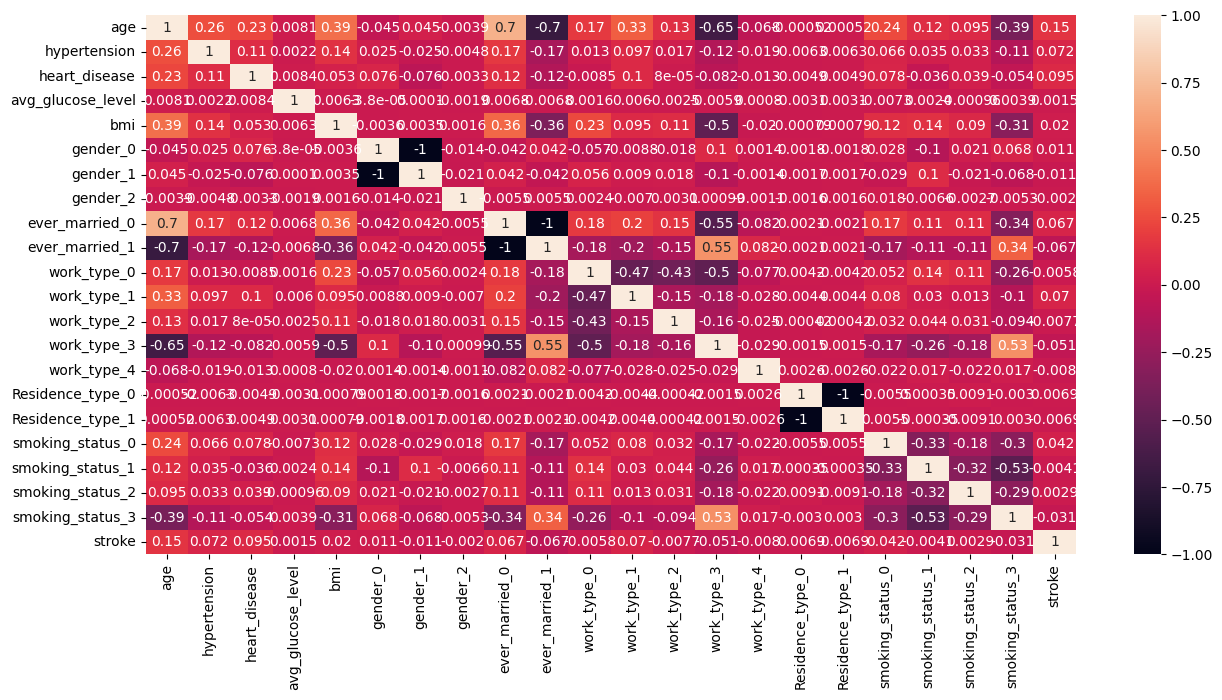

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(one_hot_encoded_data.corr(),annot=True);

# Feature Selection Using Pearson Correlation

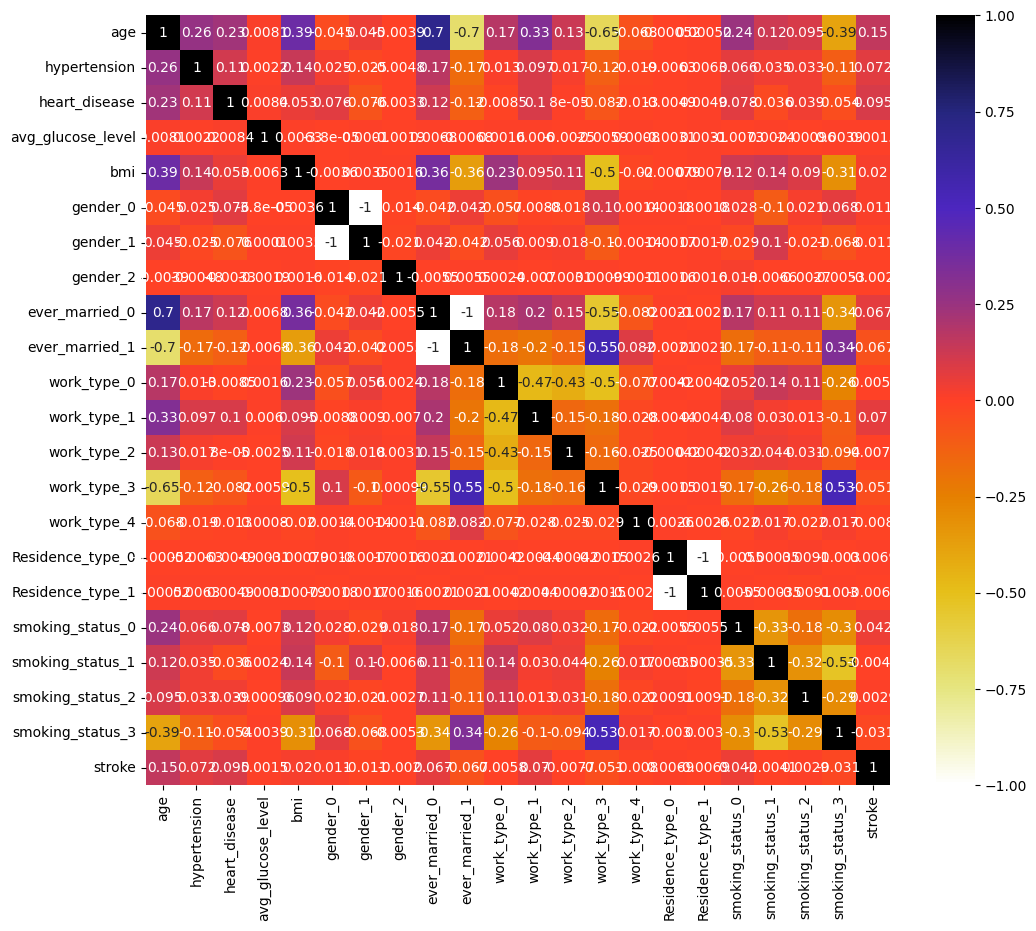

In [ ]:
cor = one_hot_encoded_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: colname = corr_matrix.columns[i]
    col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(one_hot_encoded_data, 0.6)
print(corr_features)

{'Residence_type_1'}


In [ ]:
one_hot_encoded_data.pop('Residence_type_1')
print(one_hot_encoded_data)

        age  hypertension  heart_disease  avg_glucose_level   bmi  gender_0  \
0       3.0             0              0              95.12  18.0         1   
1      58.0             1              0              87.96  39.2         1   
2       8.0             0              0             110.89  17.6         0   
3      70.0             0              0              69.04  35.9         0   
4      14.0             0              0             161.28  19.1         1   
...     ...           ...            ...                ...   ...       ...   
43394  47.0             0              0              68.52  25.2         1   
43395  10.0             0              0              58.64  20.4         0   
43397  82.0             1              0              91.94  28.9         0   
43398  40.0             0              0              99.16  33.2         1   
43399  82.0             0              0              79.48  20.6         0   

       gender_1  gender_2  ever_married_0  ever_mar

In [ ]:
print(one_hot_encoded_data.head())

    age  hypertension  heart_disease  avg_glucose_level   bmi  gender_0  \
0   3.0             0              0              95.12  18.0         1   
1  58.0             1              0              87.96  39.2         1   
2   8.0             0              0             110.89  17.6         0   
3  70.0             0              0              69.04  35.9         0   
4  14.0             0              0             161.28  19.1         1   

   gender_1  gender_2  ever_married_0  ever_married_1  ...  work_type_1  \
0         0         0               0               1  ...            0   
1         0         0               1               0  ...            0   
2         1         0               0               1  ...            0   
3         1         0               1               0  ...            0   
4         0         0               0               1  ...            0   

   work_type_2  work_type_3  work_type_4  Residence_type_0  smoking_status_0  \
0            0    

In [ ]:
one_hot_encoded_data.dtypes

age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
gender_0               uint8
gender_1               uint8
gender_2               uint8
ever_married_0         uint8
ever_married_1         uint8
work_type_0            uint8
work_type_1            uint8
work_type_2            uint8
work_type_3            uint8
work_type_4            uint8
Residence_type_0       uint8
smoking_status_0       uint8
smoking_status_1       uint8
smoking_status_2       uint8
smoking_status_3       uint8
stroke                 int64
dtype: object

# Min Max Normalization

In [ ]:
print(one_hot_encoded_data['age'].max())

82.0


In [ ]:
print(one_hot_encoded_data['age'].min())

0.08


In [ ]:
print(one_hot_encoded_data['bmi'].max())

46.4


In [ ]:
print(one_hot_encoded_data['bmi'].min())

10.1


In [ ]:
one_hot_encoded_data['age'] = (one_hot_encoded_data['age'] - one_hot_encoded_data['age'].min()) / (one_hot_encoded_data['age'].max() - one_hot_encoded_data['age'].min())
one_hot_encoded_data['avg_glucose_level'] = (one_hot_encoded_data['avg_glucose_level'] - one_hot_encoded_data['avg_glucose_level'].min()) / (one_hot_encoded_data['avg_glucose_level'].max() - one_hot_encoded_data['avg_glucose_level'].min())
one_hot_encoded_data['bmi'] = (one_hot_encoded_data['bmi'] - one_hot_encoded_data['bmi'].min()) / (one_hot_encoded_data['bmi'].max() - one_hot_encoded_data['bmi'].min())

# Define 10 fold cross validation

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Feature Labelling

In [ ]:
independent_x  = one_hot_encoded_data.iloc[:,:-1]
dependent_y = one_hot_encoded_data.iloc[:,-1]
print(independent_x.shape)
print(dependent_y.shape)

(37636, 20)
(37636,)


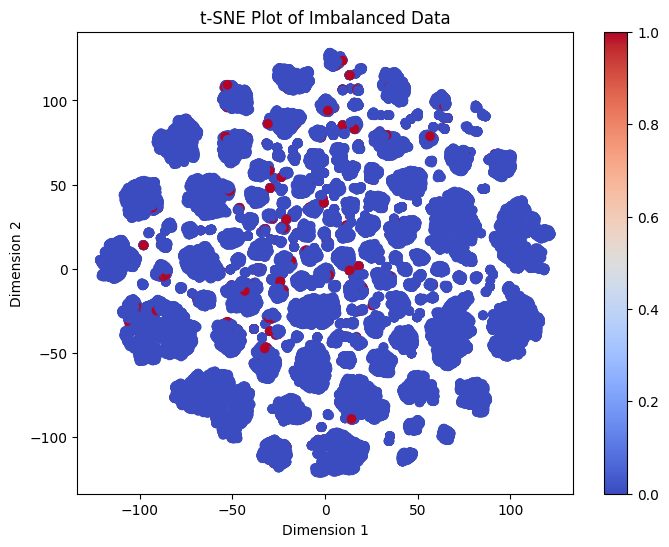

In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE to reduce the data to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(independent_x)

# Create a scatter plot of the reduced data points
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=dependent_y, cmap='coolwarm')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Plot of Imbalanced Data')
plt.colorbar()
plt.show()



Counter({0: 37110, 1: 526})


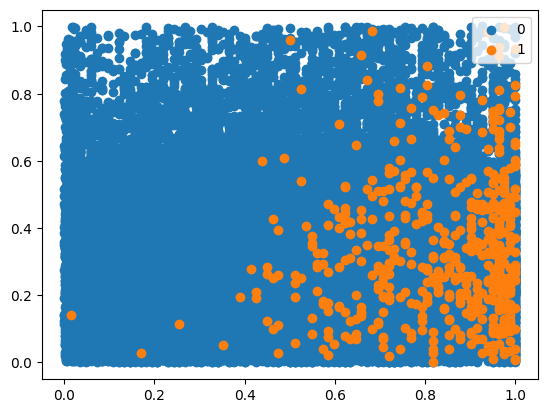

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

counter = Counter(dependent_y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(dependent_y == label)[0]
 pyplot.scatter(independent_x.iloc[row_ix, 0], independent_x.iloc[row_ix, 3], label=str(label))
pyplot.legend()
pyplot.show()

# Sampling


# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

from collections import Counter

oversample = SMOTE()

independent_x, dependent_y = oversample.fit_resample(independent_x, dependent_y)

counter = Counter(dependent_y)
print(counter)


Counter({0: 37110, 1: 37110})


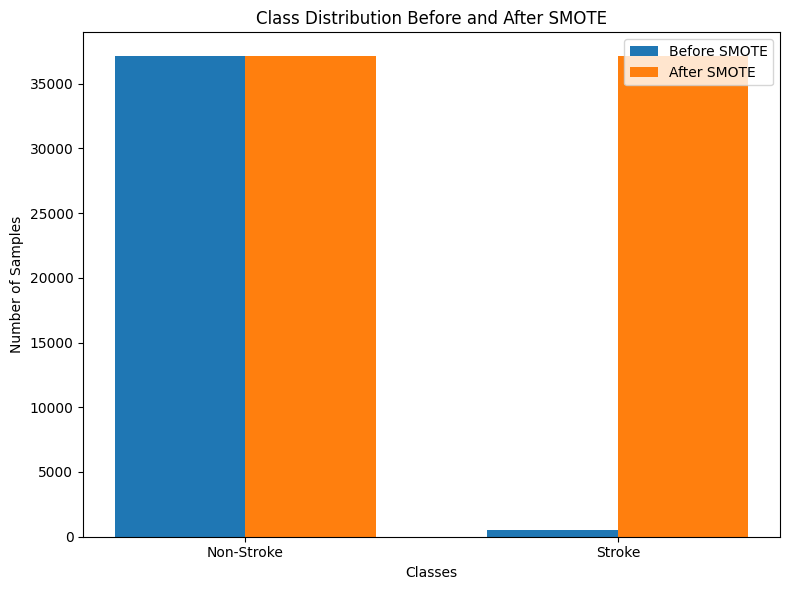

In [ ]:
class_labels = ['Non-Stroke', 'Stroke']
class_counts_before = [37110, 526]  # Number of samples before undersampling
class_counts_after = [len(dependent_y[dependent_y == 0]), len(dependent_y[dependent_y == 1])]  # Number of samples after undersampling

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
index = range(len(class_labels))

bar1 = ax.bar(index, class_counts_before, bar_width, label='Before SMOTE')
bar2 = ax.bar([p + bar_width for p in index], class_counts_after, bar_width, label='After SMOTE')

ax.set_xlabel('Classes')
ax.set_ylabel('Number of Samples')
ax.set_title('Class Distribution Before and After SMOTE')
ax.set_xticks([p + bar_width/2 for p in index])
ax.set_xticklabels(class_labels)
ax.legend()

plt.tight_layout()
plt.show()

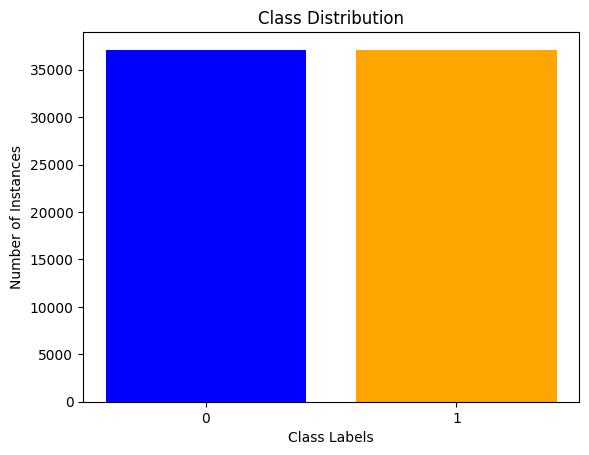

In [ ]:
# Extract class labels and their respective counts
class_labels = list(counter.keys())
class_counts = list(counter.values())

# Create a bar chart
plt.bar(class_labels, class_counts, color=['blue', 'orange'])
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.xticks(class_labels)  # Set x-ticks to class labels
plt.show()

Here we will prove decision boundary using PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(independent_x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, dependent_y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
h = 0.02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
# Get decision boundary
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

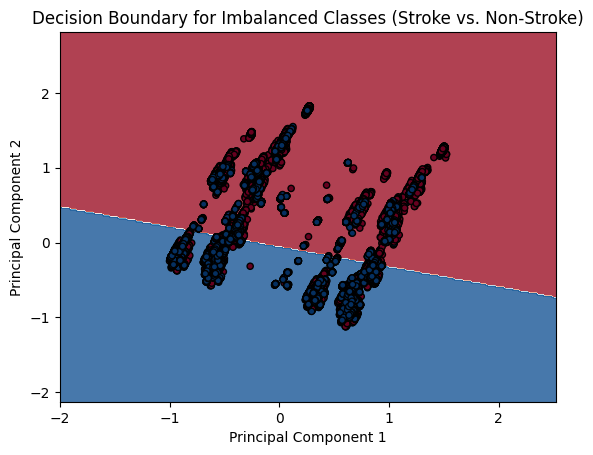

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dependent_y, edgecolors='k', cmap=plt.cm.RdBu, marker='o', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary for Imbalanced Classes (Stroke vs. Non-Stroke)')
plt.show()

# <h1>Train Test split</h1>
This train test split is used for hyperparameter tuning to find best params only.  K fold is not use this splitting

In [ ]:
# only run this when require to do hyperparamter tuning
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  independent_x,dependent_y , random_state=104,test_size=0.2, stratify = dependent_y)

# Here to prove the decision boundary Using PCA & Logistic Regression (this is no SMOTE)

In [ ]:
X = one_hot_encoded_data.drop(columns=['stroke'])  # Features
y = one_hot_encoded_data['stroke']  # Labels

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [ ]:
h = 0.02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
# Get decision boundary
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

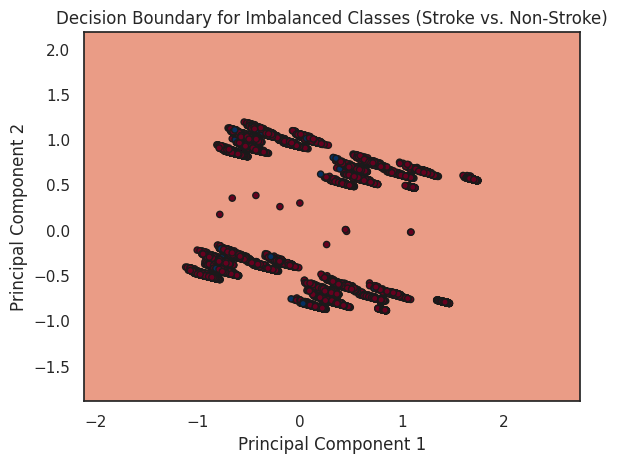

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu, marker='o', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary for Imbalanced Classes (Stroke vs. Non-Stroke)')
plt.show()

# Test logsitic regression (without smote)

In [ ]:
X = one_hot_encoded_data.drop(columns=['stroke']).values  # Features
y = one_hot_encoded_data['stroke'].values  # Labels

selected_features = [0, 1]
X_selected = X[:, selected_features]

print(X_selected)

[[0.03564453 0.        ]
 [0.70703125 1.        ]
 [0.09667969 0.        ]
 ...
 [1.         1.        ]
 [0.48730469 0.        ]
 [1.         0.        ]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

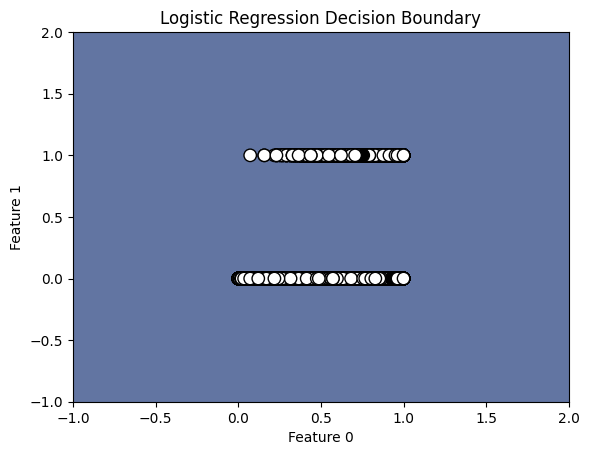

In [ ]:
# Plot the decision boundary
x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y, edgecolors='k', marker='o', s=80, linewidth=1, cmap=plt.cm.binary)
plt.xlabel('Feature {}'.format(selected_features[0]))
plt.ylabel('Feature {}'.format(selected_features[1]))
plt.title('Logistic Regression Decision Boundary')
plt.show()

# With SMOTE

In [ ]:
independent_x = independent_x.values  # Features
dependent_y = dependent_y.values  # Labels

selected_features = [0, 1]
X_selected = independent_x[:, selected_features]

print(X_selected)

[[0.03564453 0.        ]
 [0.70703125 1.        ]
 [0.09667969 0.        ]
 ...
 [0.83220132 0.        ]
 [0.9577257  0.        ]
 [0.67970276 0.        ]]


In [ ]:
print(independent_x[3])

[0.85351562 0.         0.         0.12899669 0.7107438  0.
 1.         0.         1.         0.         1.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.        ]


In [ ]:
print(independent_x[1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, dependent_y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

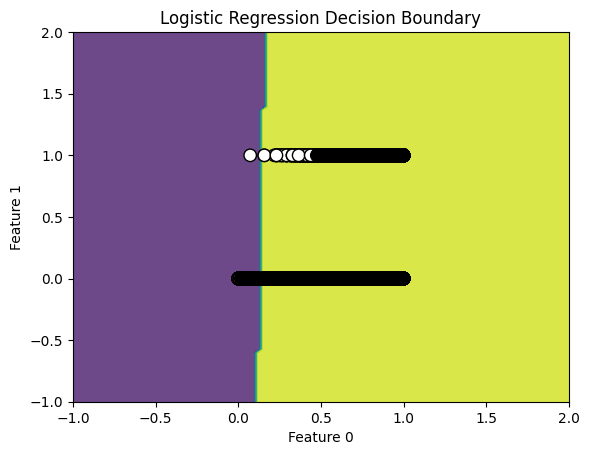

In [ ]:
# Plot the decision boundary
x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=dependent_y, edgecolors='k', marker='o', s=80, linewidth=1, cmap=plt.cm.binary)
plt.xlabel('Feature {}'.format(selected_features[0]))
plt.ylabel('Feature {}'.format(selected_features[1]))
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Normalization for Train set
only run this when require hyperparamter tuning

In [ ]:
X_train['age'] = (X_train['age'] - X_train['age'].min()) / (X_train['age'].max() - X_train['age'].min())
X_train['avg_glucose_level'] = (X_train['avg_glucose_level'] - X_train['avg_glucose_level'].min()) / (X_train['avg_glucose_level'].max() - X_train['avg_glucose_level'].min())
X_train['bmi'] = (X_train['bmi'] - X_train['bmi'].min()) / (X_train['bmi'].max() - X_train['bmi'].min())

In [ ]:
print(X_train.head())

            age  hypertension  heart_disease  avg_glucose_level       bmi  \
29023  0.145508             0              0           0.499357  0.564738   
29018  0.157715             0              0           0.402793  0.236915   
26975  0.194336             0              0           0.409041  0.393939   
24446  0.267578             0              0           0.148750  0.410468   
22829  0.328613             0              0           0.377343  0.322314   

       gender_0  gender_1  gender_2  ever_married_0  ever_married_1  \
29023         0         1         0               0               1   
29018         0         1         0               0               1   
26975         0         1         0               0               1   
24446         1         0         0               1               0   
22829         0         1         0               0               1   

       work_type_0  work_type_1  work_type_2  work_type_3  work_type_4  \
29023            0            0     

# Normalization for Test set
ONly run this when require hyperparameter tuning

In [ ]:
X_test['age'] = (X_test['age'] - X_test['age'].min()) / (X_test['age'].max() - X_test['age'].min())
X_test['avg_glucose_level'] = (X_test['avg_glucose_level'] - X_test['avg_glucose_level'].min()) / (X_test['avg_glucose_level'].max() - X_test['avg_glucose_level'].min())
X_test['bmi'] = (X_test['bmi'] - X_test['bmi'].min()) / (X_test['bmi'].max() - X_test['bmi'].min())

In [ ]:
print(X_test.head())

            age  hypertension  heart_disease  avg_glucose_level       bmi  \
29277  0.951172             1              0           0.265925  0.166205   
13015  0.743652             0              0           0.277967  0.551247   
39115  0.020996             0              0           0.089346  0.240997   
29834  0.206543             0              0           0.385054  0.290859   
4761   0.108887             0              0           0.269970  0.127424   

       gender_0  gender_1  gender_2  ever_married_0  ever_married_1  \
29277         0         1         0               1               0   
13015         1         0         0               0               1   
39115         1         0         0               0               1   
29834         1         0         0               0               1   
4761          1         0         0               0               1   

       work_type_0  work_type_1  work_type_2  work_type_3  work_type_4  \
29277            1            0     

# <h1>Naive Bayes</h1>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, accuracy_score

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
nb_model = GaussianNB()
print(nb_model)

GaussianNB()


# naive bayes with 10 cross validation

In [ ]:
accuracy_nb_list = []
roc_auc_scores_nb_list = []
precisions_nb_list = []
recalls_nb_list = []
specificity_nb_list = []
minority_tpr_scores_nb_list = []
minority_fpr_scores_nb_list = []
majority_tpr_scores_nb_list = []
majority_fpr_scores_nb_list = []
mean_fpr_nb = np.linspace(0, 1, 100)
tpr_accumulated_nb = 0

Fold 1:


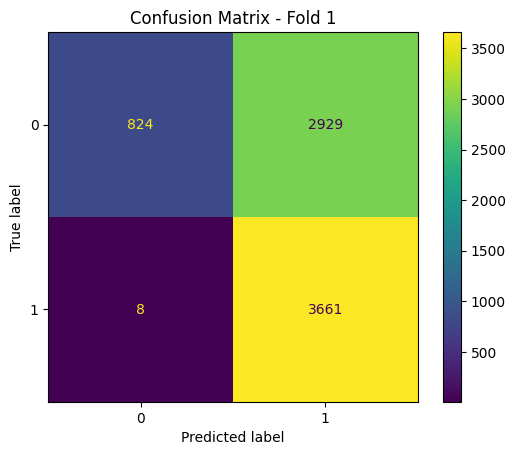

Accuracy: 0.60
Precision: 0.56
Recall: 1.00
Specificity: 0.22
AUC: 0.82
Predictions on y_test: [0 1 0 ... 1 1 1]
Minority TPR: 0.56
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.44
Fold 2:


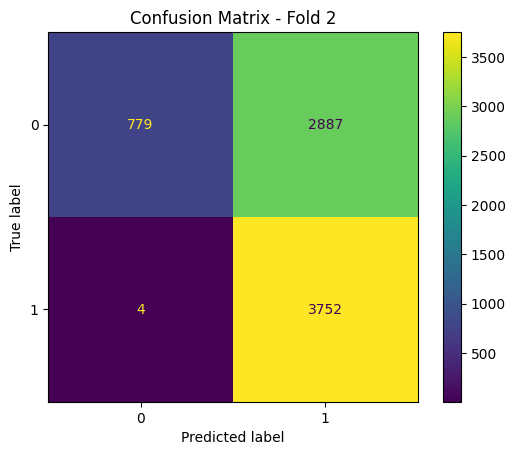

Accuracy: 0.61
Precision: 0.57
Recall: 1.00
Specificity: 0.21
AUC: 0.82
Predictions on y_test: [0 1 1 ... 1 1 1]
Minority TPR: 0.57
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.43
Fold 3:


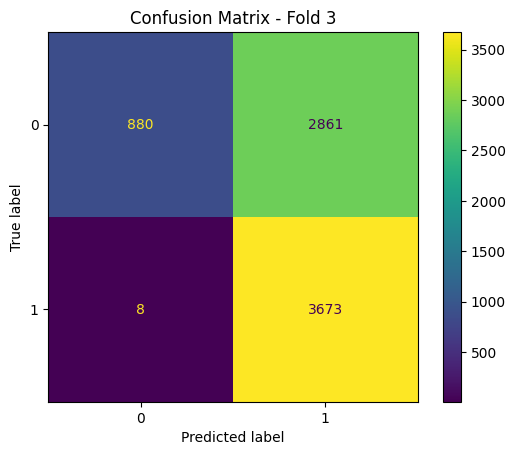

Accuracy: 0.61
Precision: 0.56
Recall: 1.00
Specificity: 0.24
AUC: 0.83
Predictions on y_test: [1 1 0 ... 1 1 1]
Minority TPR: 0.56
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.44
Fold 4:


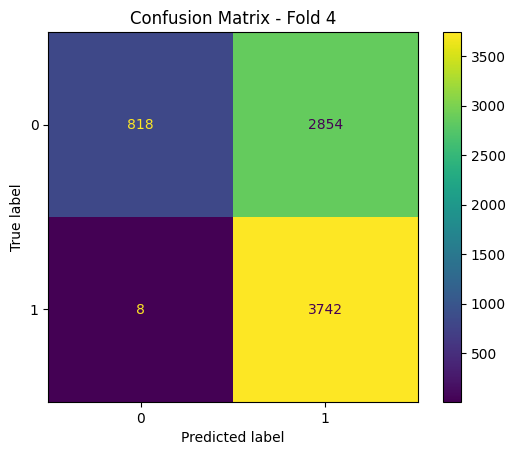

Accuracy: 0.61
Precision: 0.57
Recall: 1.00
Specificity: 0.22
AUC: 0.81
Predictions on y_test: [0 1 1 ... 1 1 1]
Minority TPR: 0.57
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.43
Fold 5:


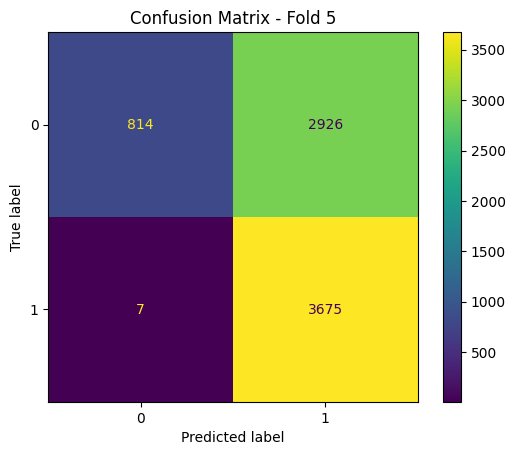

Accuracy: 0.60
Precision: 0.56
Recall: 1.00
Specificity: 0.22
AUC: 0.82
Predictions on y_test: [1 1 1 ... 1 1 1]
Minority TPR: 0.56
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.44
Fold 6:


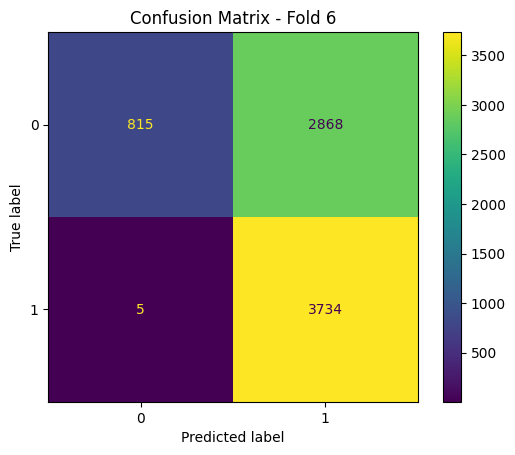

Accuracy: 0.61
Precision: 0.57
Recall: 1.00
Specificity: 0.22
AUC: 0.82
Predictions on y_test: [1 1 1 ... 1 1 1]
Minority TPR: 0.57
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.43
Fold 7:


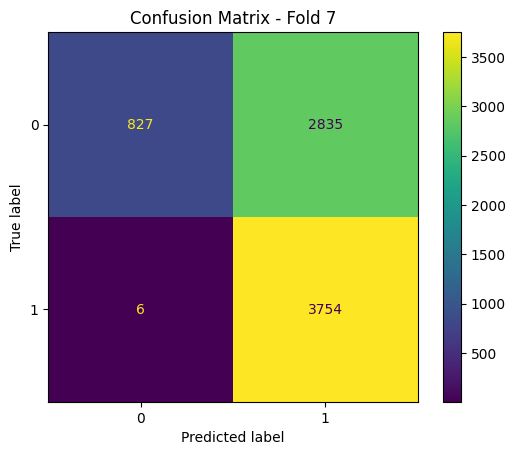

Accuracy: 0.62
Precision: 0.57
Recall: 1.00
Specificity: 0.23
AUC: 0.81
Predictions on y_test: [1 1 1 ... 1 1 1]
Minority TPR: 0.57
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.43
Fold 8:


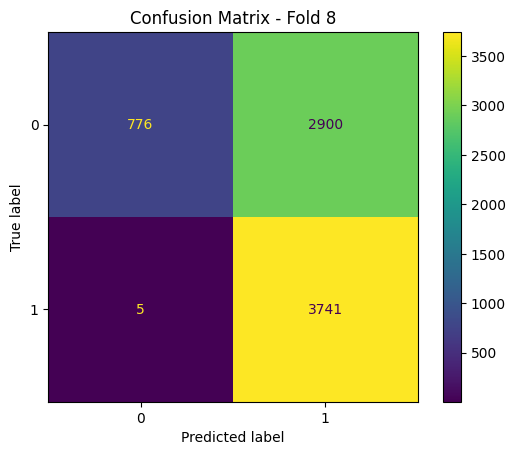

Accuracy: 0.61
Precision: 0.56
Recall: 1.00
Specificity: 0.21
AUC: 0.81
Predictions on y_test: [1 1 1 ... 1 1 1]
Minority TPR: 0.56
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.44
Fold 9:


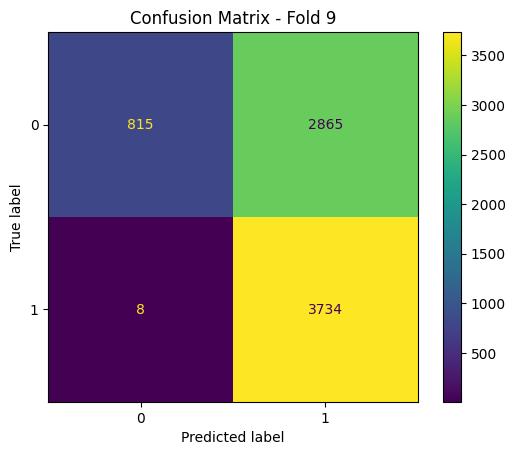

Accuracy: 0.61
Precision: 0.57
Recall: 1.00
Specificity: 0.22
AUC: 0.82
Predictions on y_test: [1 1 1 ... 1 1 1]
Minority TPR: 0.57
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.43
Fold 10:


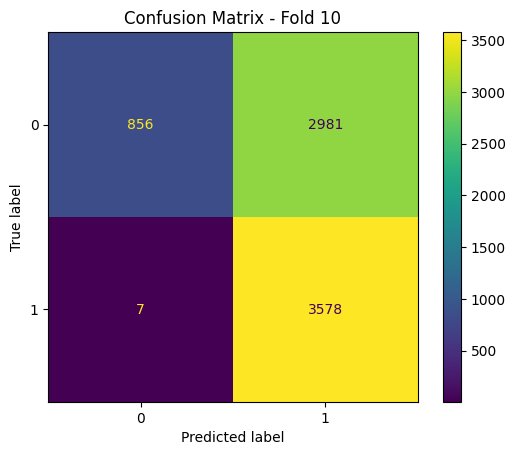

Accuracy: 0.60
Precision: 0.55
Recall: 1.00
Specificity: 0.22
AUC: 0.83
Predictions on y_test: [0 0 1 ... 1 1 1]
Minority TPR: 0.55
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.45


In [ ]:
for i,(train_idx, val_idx) in enumerate(kf.split(independent_x)):
    print(f"Fold {i+1}:")
    X_train_fold, X_val_fold = independent_x.iloc[train_idx], independent_x.iloc[val_idx]
    y_train_fold, y_val_fold = dependent_y.iloc[train_idx], dependent_y.iloc[val_idx]

    # Train the model on the training fold
    nb_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred_nb = nb_model.predict(X_val_fold)

    cm_nb = confusion_matrix(y_val_fold, y_val_pred_nb, labels=nb_model.classes_)

    disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb,display_labels=nb_model.classes_)

    disp_nb.plot()
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.show()

    TP = cm_nb[1,1]
    TN = cm_nb[0,0]
    FP = cm_nb[0,1]
    FN = cm_nb[1,0]

    accuracy_nb = nb_model.score(X_val_fold, y_val_fold)
    precision_nb = precision_score(y_val_fold, y_val_pred_nb)
    recall_nb = recall_score(y_val_fold, y_val_pred_nb)
    specificity_nb = TN / float(TN+FP)
    fpr_nb, tpr_nb, _ = roc_curve(y_val_fold, nb_model.predict_proba(X_val_fold)[:, 1])

    # Interpolate the ROC curve at the mean_fpr points
    tpr_accumulated_nb += np.interp(mean_fpr_nb, fpr_nb, tpr_nb)
    tpr_accumulated_nb[0] = 0.0

    minority_tpr_nb = cm_nb[1, 1] / (cm_nb[1, 1] + cm_nb[0, 1])
    majority_tpr_nb = cm_nb[0, 0] / (cm_nb[0, 0] + cm_nb[1, 0])
    minority_fpr_nb = cm_nb[1, 0] / (cm_nb[1, 0] + cm_nb[0, 0])
    majority_fpr_nb = cm_nb[0, 1] / (cm_nb[0, 1] + cm_nb[1, 1])

    print(f"Accuracy: {accuracy_nb:.2f}")
    print(f"Precision: {precision_nb:.2f}")
    print(f"Recall: {recall_nb:.2f}")
    print(f"Specificity: {specificity_nb:.2f}")
    print(f"AUC: {auc(fpr_nb, tpr_nb):.2f}")
    print(f"Predictions on y_test: {y_val_pred_nb}")
    print(f"Minority TPR: {minority_tpr_nb:.2f}")
    print(f"Minority FPR: {minority_fpr_nb:.2f}")
    print(f"Majoority TPR: {majority_tpr_nb:.2f}")
    print(f"Majority FPR: {majority_fpr_nb:.2f}")

    # snesitivity = recall
    accuracy_nb_list.append(accuracy_nb)
    roc_auc_scores_nb_list.append(auc(fpr_nb, tpr_nb))
    precisions_nb_list.append(precision_nb)
    recalls_nb_list.append(recall_nb)
    specificity_nb_list.append(specificity_nb)

    minority_tpr_scores_nb_list.append(minority_tpr_nb)
    minority_fpr_scores_nb_list.append(minority_fpr_nb)
    majority_tpr_scores_nb_list.append(majority_tpr_nb)
    majority_fpr_scores_nb_list.append(majority_fpr_nb)

In [ ]:
avg_accuracy_nb = np.mean(accuracy_nb_list)
avg_roc_auc_nb = np.mean(roc_auc_scores_nb_list)
avg_precision_nb = np.mean(precisions_nb_list)
avg_recall_nb = np.mean(recalls_nb_list)
avg_specificity_nb = np.mean(specificity_nb_list)
avg_minority_tpr_nb = np.mean(minority_tpr_scores_nb_list)
avg_minority_fpr_nb = np.mean(minority_fpr_scores_nb_list)
avg_majority_tpr_nb = np.mean(majority_tpr_scores_nb_list)
abg_majority_fpr_nb = np.mean(majority_fpr_scores_nb_list)

In [ ]:
print("Average Accuracy:", avg_accuracy_nb)
print("Average ROC AUC Score:", avg_roc_auc_nb)
print("Average Precision Score:", avg_precision_nb)
print("Average Recall Score:", avg_recall_nb)
print("Average Specificity:", avg_specificity_nb)
print("Average Minority TPR:", avg_minority_tpr_nb)
print("Average Minority FPR:", avg_minority_fpr_nb)
print("Average aMajority TPR:", avg_majority_tpr_nb)
print("Average Majority FPR:", abg_majority_fpr_nb)

Average Accuracy: 0.6073699811371599
Average ROC AUC Score: 0.8179021200898898
Average Precision Score: 0.5602109445625183
Average Recall Score: 0.9987857369667996
Average Specificity: 0.21591386936570434
Average Minority TPR: 0.5602109445625183
Average Minority FPR: 0.005616655491176281
Average aMajority TPR: 0.9943833445088236
Average Majority FPR: 0.43978905543748176


In [ ]:
# Calculate the mean true positive rate
mean_tpr_nb = tpr_accumulated_nb / kf.get_n_splits()

# Calculate the AUC for the mean ROC curve
mean_auc_nb = auc(mean_fpr_nb, mean_tpr_nb)

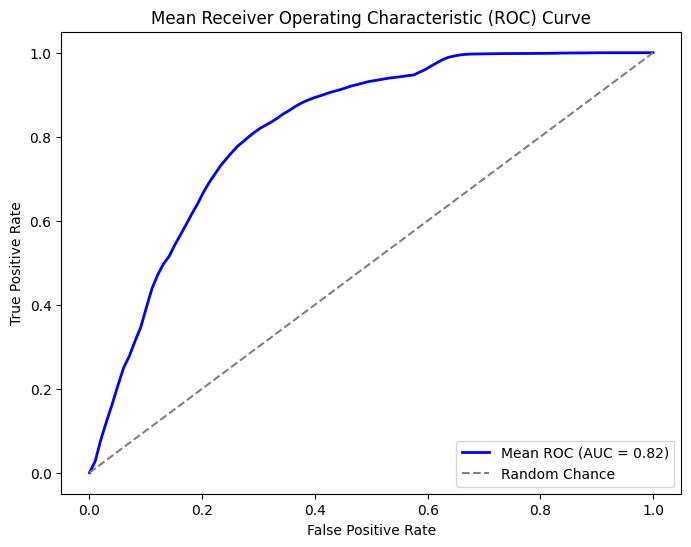

In [ ]:
# Plot the mean ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='b', label=f'Mean ROC (AUC = {mean_auc_nb:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
filename = 'naive_bayes_capstone.sav'
joblib.dump(nb_model, filename)

['naive_bayes_capstone.sav']

# <h1>Random Forest</h1>

# Hyperparameter tuning to find best params for RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)

In [ ]:
# no need to run this ady cuz found the best param
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring='roc_auc')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [ ]:
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
best_rf_model = grid_search.best_estimator_

In [ ]:
joblib.dump(best_rf_model, '/content/drive/MyDrive/Colab Notebooks/Capstone/best_rf_capstone.sav')

['/content/drive/MyDrive/Colab Notebooks/Capstone/best_rf_capstone.sav']

# K fold RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
class_weights_rf = {0: 1, 1: 71}
#rf_model = RandomForestClassifier(random_state=42)
model_rf = RandomForestClassifier( min_samples_leaf=1, min_samples_split=2, n_estimators=300, max_depth = 30,random_state=42)

In [ ]:
accuracy_rf_list = []
roc_auc_scores_rf_list = []
precisions_rf_list = []
recalls_rf_list = []
specificity_rf_list = []
minority_tpr_scores_rf_list = []
majority_tpr_scores_rf_list = []
minority_fpr_scores_rf_list = []
majority_fpr_scores_rf_list = []
mean_fpr_rf = np.linspace(0, 1, 100)
tpr_accumulated_rf = 0

Fold 1:


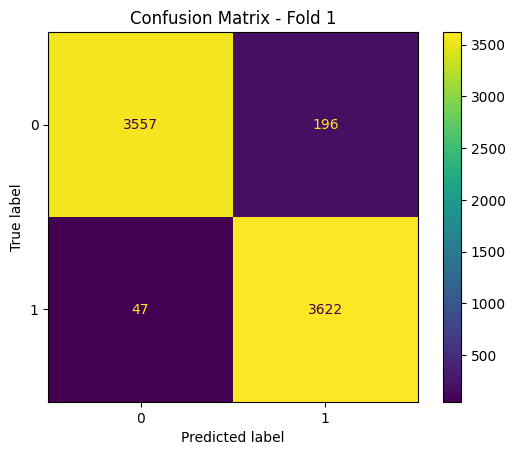

Accuracy: 0.97
Precision: 0.95
Recall: 0.99
Specificity: 0.95
AUC: 1.00
Minority TPR: 0.95
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.05
Fold 2:


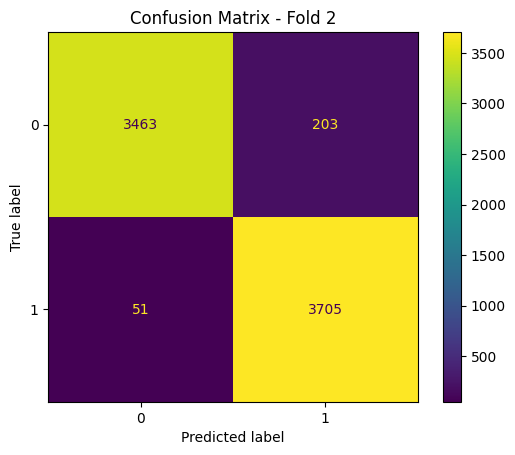

Accuracy: 0.97
Precision: 0.95
Recall: 0.99
Specificity: 0.94
AUC: 1.00
Minority TPR: 0.95
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.05
Fold 3:


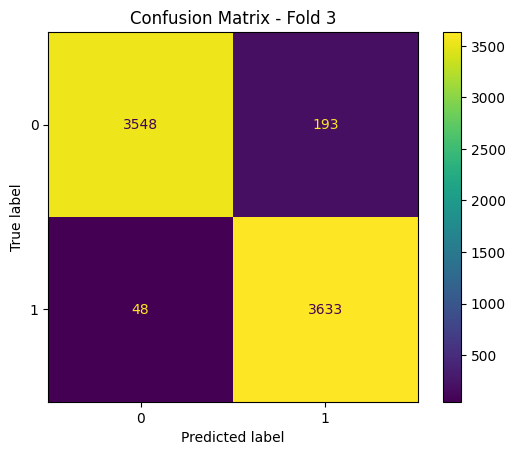

Accuracy: 0.97
Precision: 0.95
Recall: 0.99
Specificity: 0.95
AUC: 1.00
Minority TPR: 0.95
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.05
Fold 4:


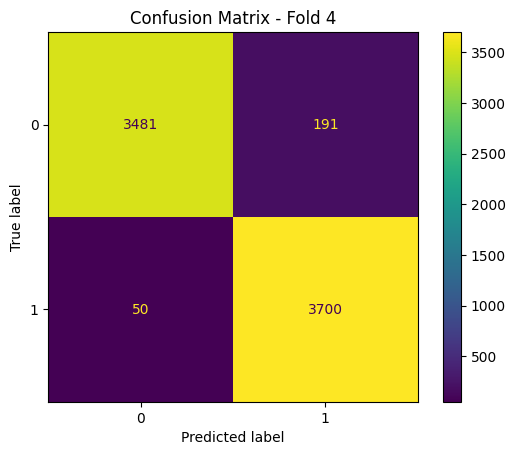

Accuracy: 0.97
Precision: 0.95
Recall: 0.99
Specificity: 0.95
AUC: 1.00
Minority TPR: 0.95
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.05
Fold 5:


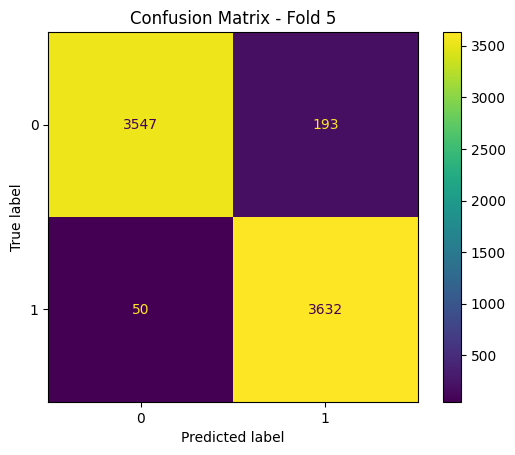

Accuracy: 0.97
Precision: 0.95
Recall: 0.99
Specificity: 0.95
AUC: 1.00
Minority TPR: 0.95
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.05
Fold 6:


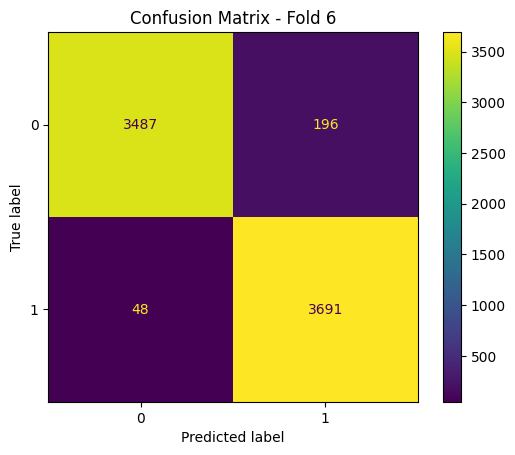

Accuracy: 0.97
Precision: 0.95
Recall: 0.99
Specificity: 0.95
AUC: 1.00
Minority TPR: 0.95
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.05
Fold 7:


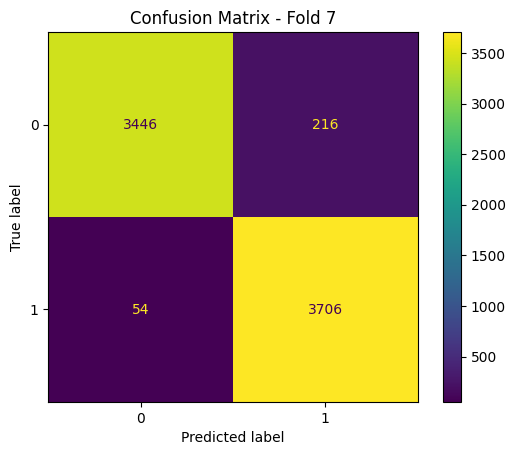

Accuracy: 0.96
Precision: 0.94
Recall: 0.99
Specificity: 0.94
AUC: 1.00
Minority TPR: 0.94
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.06
Fold 8:


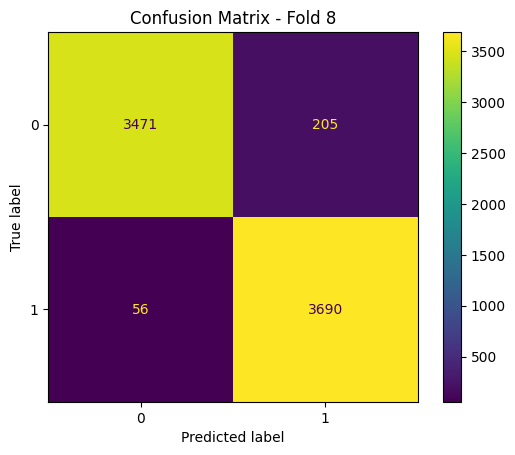

Accuracy: 0.96
Precision: 0.95
Recall: 0.99
Specificity: 0.94
AUC: 1.00
Minority TPR: 0.95
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.05
Fold 9:


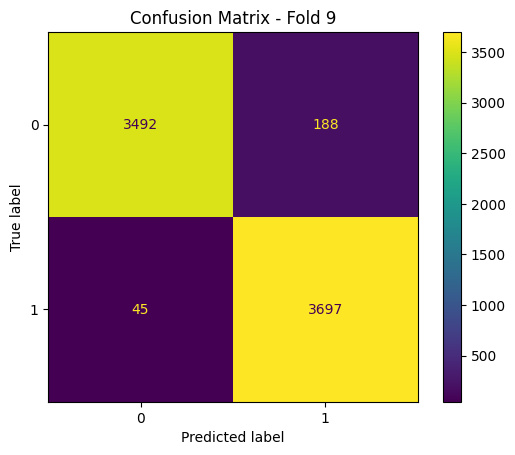

Accuracy: 0.97
Precision: 0.95
Recall: 0.99
Specificity: 0.95
AUC: 1.00
Minority TPR: 0.95
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.05
Fold 10:


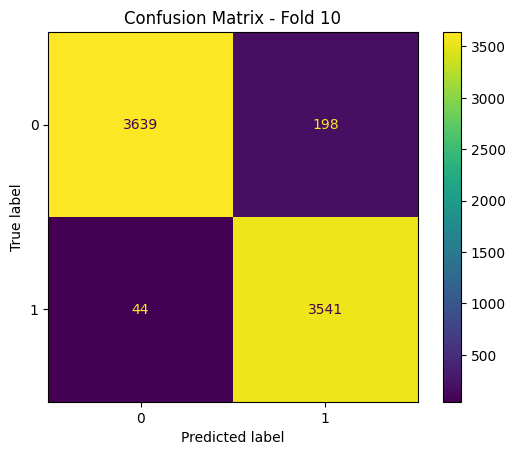

Accuracy: 0.97
Precision: 0.95
Recall: 0.99
Specificity: 0.95
AUC: 1.00
Minority TPR: 0.95
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.05


In [ ]:
for i,(train_idx, val_idx) in enumerate(kf.split(independent_x)):
    print(f"Fold {i+1}:")
    X_train_fold, X_val_fold = independent_x.iloc[train_idx], independent_x.iloc[val_idx]
    y_train_fold, y_val_fold = dependent_y.iloc[train_idx], dependent_y.iloc[val_idx]


    model_rf.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred_rf = model_rf.predict(X_val_fold)

    cm_rf = confusion_matrix(y_val_fold, y_val_pred_rf, labels=model_rf.classes_)

    disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=model_rf.classes_)

    disp_rf.plot()
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.show()

    TP = cm_rf[1,1]
    TN = cm_rf[0,0]
    FP = cm_rf[0,1]
    FN = cm_rf[1,0]

    accuracy_rf = model_rf.score(X_val_fold, y_val_fold)
    precision_rf = precision_score(y_val_fold, y_val_pred_rf)
    recall_rf = recall_score(y_val_fold, y_val_pred_rf)
    specificity_rf = TN / float(TN+FP)
    fpr_rf, tpr_rf, _ = roc_curve(y_val_fold, model_rf.predict_proba(X_val_fold)[:, 1])

    # Interpolate the ROC curve at the mean_fpr points
    tpr_accumulated_rf += np.interp(mean_fpr_rf, fpr_rf, tpr_rf)
    tpr_accumulated_rf[0] = 0.0

    minority_tpr_rf = cm_rf[1, 1] / (cm_rf[1, 1] + cm_rf[0, 1])
    majority_tpr_rf = cm_rf[0, 0] / (cm_rf[0, 0] + cm_rf[1, 0])
    minority_fpr_rf = cm_rf[1, 0] / (cm_rf[1, 0] + cm_rf[0, 0])
    majority_fpr_rf = cm_rf[0, 1] / (cm_rf[0, 1] + cm_rf[1, 1])

    print(f"Accuracy: {accuracy_rf:.2f}")
    print(f"Precision: {precision_rf:.2f}")
    print(f"Recall: {recall_rf:.2f}")
    print(f"Specificity: {specificity_rf:.2f}")
    print(f"AUC: {auc(fpr_rf, tpr_rf):.2f}")
    # print(f"Predictions on y_test: {y_val_pred_rf}")

    print(f"Minority TPR: {minority_tpr_rf:.2f}")
    print(f"Minority FPR: {minority_fpr_rf:.2f}")
    print(f"Majoority TPR: {majority_tpr_rf:.2f}")
    print(f"Majority FPR: {majority_fpr_rf:.2f}")


    accuracy_rf_list.append(accuracy_rf)
    roc_auc_scores_rf_list.append(auc(fpr_rf, tpr_rf))
    precisions_rf_list.append(precision_rf)
    recalls_rf_list.append(recall_rf)
    specificity_rf_list.append(specificity_rf)

    minority_tpr_scores_rf_list.append(minority_tpr_rf)
    minority_fpr_scores_rf_list.append(minority_fpr_rf)
    majority_tpr_scores_rf_list.append(majority_tpr_rf)
    majority_fpr_scores_rf_list.append(majority_fpr_rf)

In [ ]:
avg_accuracy_rf = np.mean(accuracy_rf_list)
avg_roc_auc_rf = np.mean(roc_auc_scores_rf_list)
avg_precision_rf = np.mean(precisions_rf_list)
avg_recall_rf = np.mean(recalls_rf_list)
avg_specificity_rf = np.mean(specificity_rf_list)
avg_minority_tpr_rf = np.mean(minority_tpr_scores_rf_list)
avg_minority_fpr_rf = np.mean(minority_fpr_scores_rf_list)
avg_majority_tpr_rf = np.mean(majority_tpr_scores_rf_list)
avg_majority_fpr_rf = np.mean(majority_fpr_scores_rf_list)

In [ ]:
print("Average Accuracy:", avg_accuracy_rf)
print("Average ROC AUC Score:", avg_roc_auc_rf)
print("Average Precision Score:", avg_precision_rf)
print("Average Recall Score:", avg_recall_rf)
print("Average Specificity:", avg_specificity_rf)
print("Average Minority TPR:", avg_minority_tpr_rf)
print("Average Minority FPR:", avg_minority_fpr_rf)
print("Average Majority TPR:", avg_majority_tpr_rf)
print("Average Majority FPR:", avg_majority_fpr_rf)

Average Accuracy: 0.9663971975208838
Average ROC AUC Score: 0.9959873497679306
Average Precision Score: 0.9480930249156272
Average Recall Score: 0.9868123811613609
Average Specificity: 0.9459535539314222
Average Minority TPR: 0.9480930249156272
Average Minority FPR: 0.013729604075455929
Average Majority TPR: 0.986270395924544
Average Majority FPR: 0.05190697508437271


In [ ]:
# Calculate the mean true positive rate
mean_tpr_rf = tpr_accumulated_rf / kf.get_n_splits()

# Calculate the AUC for the mean ROC curve
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)

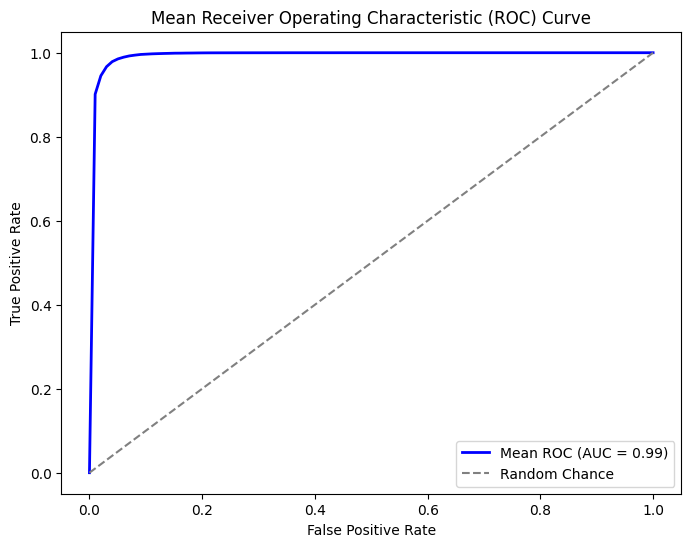

In [ ]:
# Plot the mean ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr_rf, mean_tpr_rf, color='b', label=f'Mean ROC (AUC = {mean_auc_rf:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<h1>Decision Tree</h1>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning for DT

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=10, scoring='roc_auc')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [ ]:
best_params_dt = grid_search_dt.best_params_
print(best_params_dt)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
best_dt_model = grid_search_dt.best_estimator_

In [ ]:
joblib.dump(best_dt_model, '/content/drive/MyDrive/Colab Notebooks/Capstone/best_dt_capstone.joblib')

['/content/drive/MyDrive/Colab Notebooks/Capstone/best_dt_capstone.joblib']

In [ ]:
best_params_dt = grid_search_dt.best_params_
print(best_params_dt)

#  K fold DT

In [ ]:
weights = {0:1.0, 1:70.0}
model_dt = DecisionTreeClassifier(random_state=42, criterion= 'entropy',  min_samples_leaf=4 ,min_samples_split=10)

In [ ]:
accuracy_dt_list = []
roc_auc_scores_dt_list = []
precisions_dt_list = []
recalls_dt_list = []
specificity_dt_list = []
minority_tpr_scores_dt_list = []
majority_tpr_scores_dt_list = []
minority_fpr_scores_dt_list = []
majority_fpr_scores_dt_list = []
mean_fpr_dt = np.linspace(0, 1, 100)
tpr_accumulated_dt = 0

Fold 1:


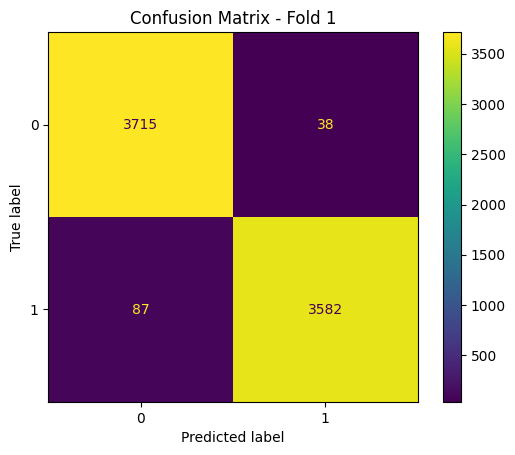

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 2:


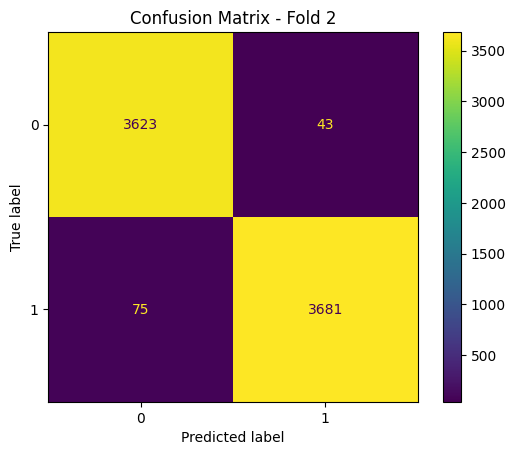

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 3:


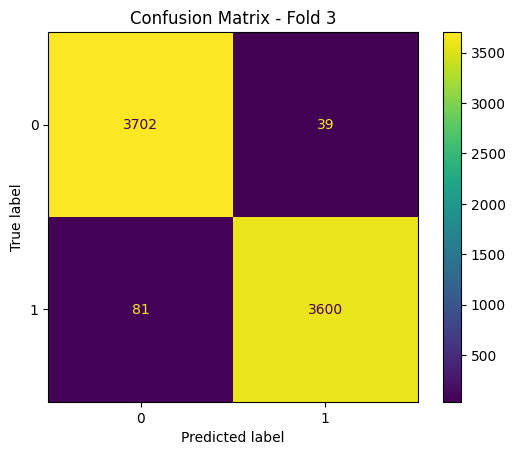

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 4:


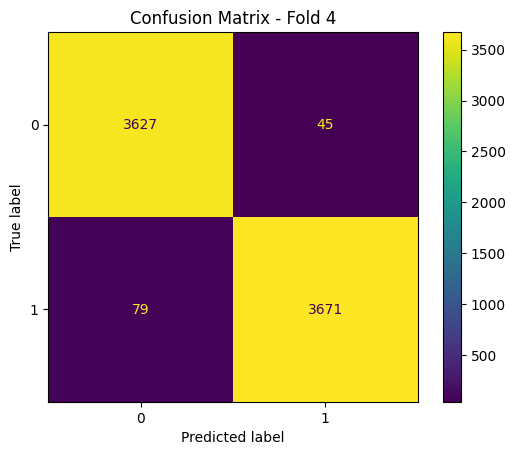

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 5:


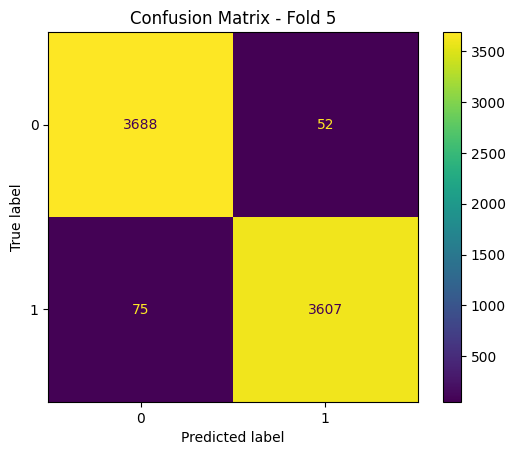

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 6:


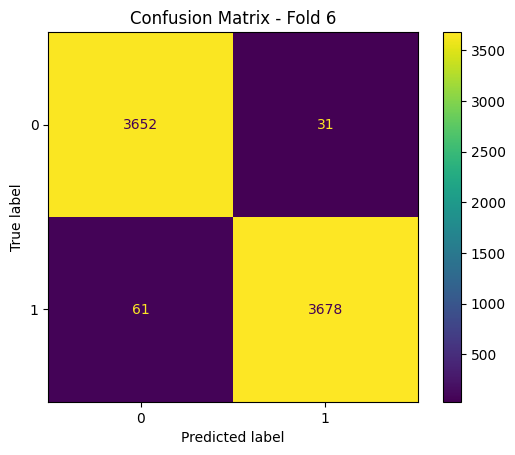

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 7:


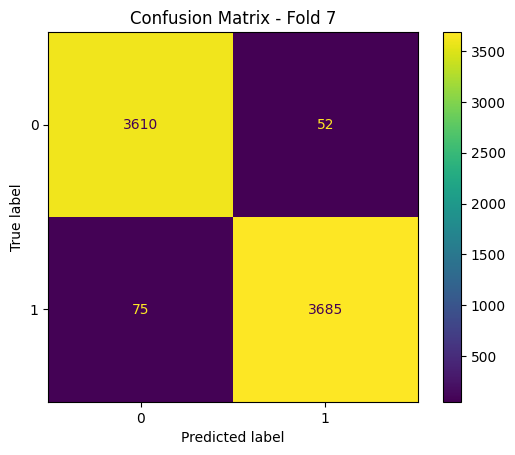

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 8:


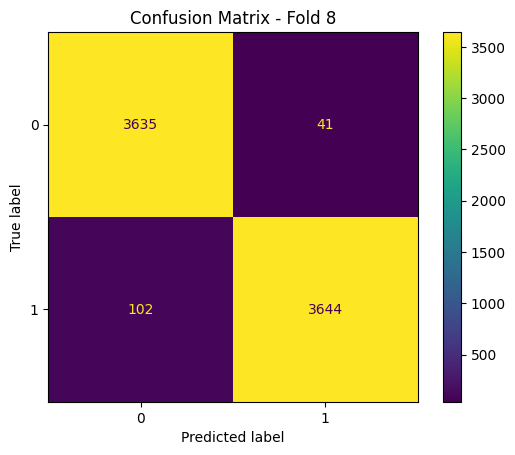

Accuracy: 0.98
Precision: 0.99
Recall: 0.97
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.03
Majoority TPR: 0.97
Majority FPR: 0.01
Fold 9:


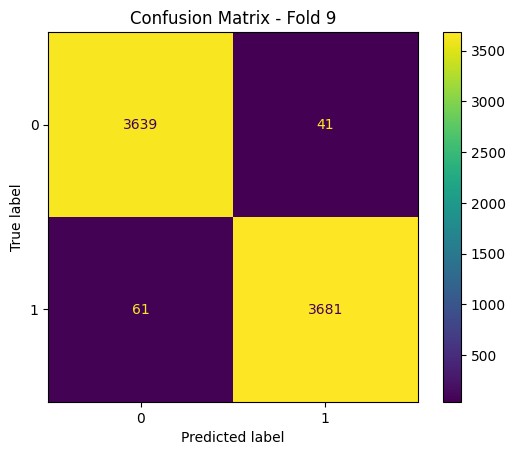

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 10:


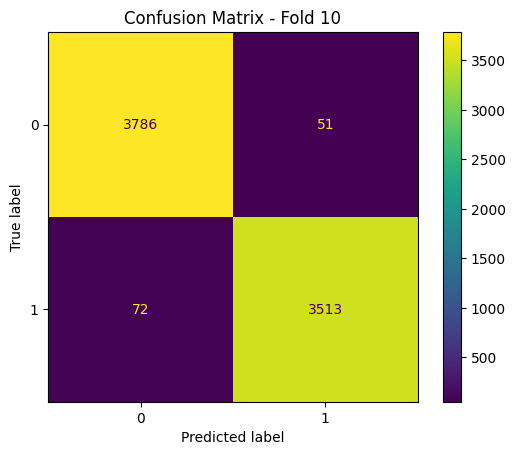

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01


In [ ]:
for i,(train_idx, val_idx) in enumerate(kf.split(independent_x)):
    print(f"Fold {i+1}:")
    X_train_fold, X_val_fold = independent_x.iloc[train_idx], independent_x.iloc[val_idx]
    y_train_fold, y_val_fold = dependent_y.iloc[train_idx], dependent_y.iloc[val_idx]

    model_dt.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred_dt = model_dt.predict(X_val_fold)

    cm_dt = confusion_matrix(y_val_fold, y_val_pred_dt, labels=model_dt.classes_)

    disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=model_dt.classes_)

    disp_dt.plot()
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.show()

    TP = cm_dt[1,1]
    TN = cm_dt[0,0]
    FP = cm_dt[0,1]
    FN = cm_dt[1,0]

    accuracy_dt = model_dt.score(X_val_fold, y_val_fold)
    precision_dt = precision_score(y_val_fold, y_val_pred_dt)
    recall_dt = recall_score(y_val_fold, y_val_pred_dt)
    specificity_dt = TN / float(TN+FP)
    fpr_dt, tpr_dt, _ = roc_curve(y_val_fold, model_dt.predict_proba(X_val_fold)[:, 1])

    # Interpolate the ROC curve at the mean_fpr points
    tpr_accumulated_dt += np.interp(mean_fpr_dt, fpr_dt, tpr_dt)
    tpr_accumulated_dt[0] = 0.0


    minority_tpr_dt = cm_dt[1, 1] / (cm_dt[1, 1] + cm_dt[0, 1])
    majority_tpr_dt = cm_dt[0, 0] / (cm_dt[0, 0] + cm_dt[1, 0])
    minority_fpr_dt = cm_dt[1, 0] / (cm_dt[1, 0] + cm_dt[0, 0])
    majority_fpr_dt = cm_dt[0, 1] / (cm_dt[0, 1] + cm_dt[1, 1])

    print(f"Accuracy: {accuracy_dt:.2f}")
    print(f"Precision: {precision_dt:.2f}")
    print(f"Recall: {recall_dt:.2f}")
    print(f"Specificity: {specificity_dt:.2f}")
    print(f"AUC: {auc(fpr_dt, tpr_dt):.2f}")
    # print(f"Predictions on y_test: {y_val_pred_dt}")
    print(f"Minority TPR: {minority_tpr_dt:.2f}")
    print(f"Minority FPR: {minority_fpr_dt:.2f}")
    print(f"Majoority TPR: {majority_tpr_dt:.2f}")
    print(f"Majority FPR: {majority_fpr_dt:.2f}")

    accuracy_dt_list.append(accuracy_dt)
    roc_auc_scores_dt_list.append(auc(fpr_dt, tpr_dt))
    precisions_dt_list.append(precision_dt)
    recalls_dt_list.append(recall_dt)
    specificity_dt_list.append(specificity_dt)
    minority_tpr_scores_dt_list.append(minority_tpr_dt)
    minority_fpr_scores_dt_list.append(minority_fpr_dt)
    majority_tpr_scores_dt_list.append(majority_tpr_dt)
    majority_fpr_scores_dt_list.append(majority_fpr_dt)


In [ ]:
avg_accuracy_dt = np.mean(accuracy_dt_list)
avg_roc_auc_dt = np.mean(roc_auc_scores_dt_list)
avg_precision_dt = np.mean(precisions_dt_list)
avg_recall_dt = np.mean(recalls_dt_list)
avg_specificity_dt = np.mean(specificity_dt_list)
avg_minority_tpr_dt = np.mean(minority_tpr_scores_dt_list)
avg_minority_fpr_dt = np.mean(minority_fpr_scores_dt_list)
avg_majority_tpr_dt = np.mean(majority_tpr_scores_dt_list)
abg_majority_fpr_dt = np.mean(majority_fpr_scores_dt_list)

In [ ]:
print("Average Accuracy:", avg_accuracy_dt)
print("Average ROC AUC Score:", avg_roc_auc_dt)
print("Average Precision Score:", avg_precision_dt)
print("Average Recall Score:", avg_recall_dt)
print("Average Specificity:", avg_specificity_dt)
print("Average Minority TPR:", avg_minority_tpr_dt)
print("Average Minority FPR:", avg_minority_fpr_dt)
print("Average Majority TPR:", avg_majority_tpr_dt)
print("Average Majority FPR:", abg_majority_fpr_dt)

Average Accuracy: 0.9834950148208031
Average ROC AUC Score: 0.9894300915142116
Average Precision Score: 0.9872305154503467
Average Recall Score: 0.9796589574474156
Average Specificity: 0.987338473176254
Average Minority TPR: 0.9872305154503467
Average Minority FPR: 0.02019519852923994
Average Majority TPR: 0.9798048014707602
Average Majority FPR: 0.01276948454965321


In [ ]:
# Calculate the mean true positive rate
mean_tpr_dt = tpr_accumulated_dt / kf.get_n_splits()

# Calculate the AUC for the mean ROC curve
mean_auc_dt = auc(mean_fpr_dt, mean_tpr_dt)

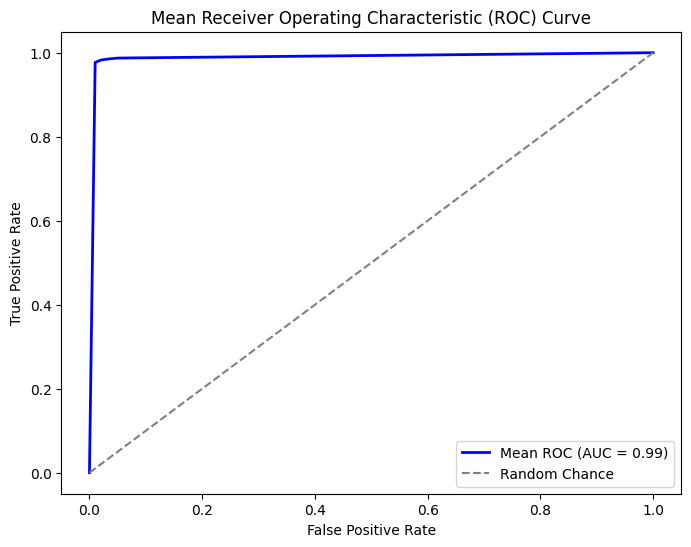

In [ ]:
# Plot the mean ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='b', label=f'Mean ROC (AUC = {mean_auc_dt:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
filename = 'decision_tree_capstone.sav'
joblib.dump(model_dt, filename)

['decision_tree_capstone.sav']

# <h1>XGBoost</h1>

# Hyperparameter tuning to find best params for XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=10, scoring='roc_auc')

In [ ]:
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [ ]:
best_params_xgb = grid_search_xgb.best_params_
print(best_params_xgb)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [ ]:
best_xgb_model = grid_search_xgb.best_estimator_

In [ ]:
joblib.dump(best_xgb_model, '/content/drive/MyDrive/Colab Notebooks/Capstone/best_xgb_capstone.sav')

['/content/drive/MyDrive/Colab Notebooks/Capstone/best_xgb_capstone.sav']

# Stratified K fold XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier(random_state=42, learning_rate= 0.1, max_depth= 5, n_estimators= 300)

In [ ]:
accuracy_xgb_list = []
roc_auc_scores_xgb_list = []
precisions_xgb_list = []
recalls_xgb_list = []
specificity_xgb_list = []
minority_tpr_scores_xgb_list = []
majority_tpr_scores_xgb_list = []
minority_fpr_scores_xgb_list = []
majority_fpr_scores_xgb_list = []
mean_fpr_xgb = np.linspace(0, 1, 100)
tpr_accumulated_xgb = 0

Fold 1:


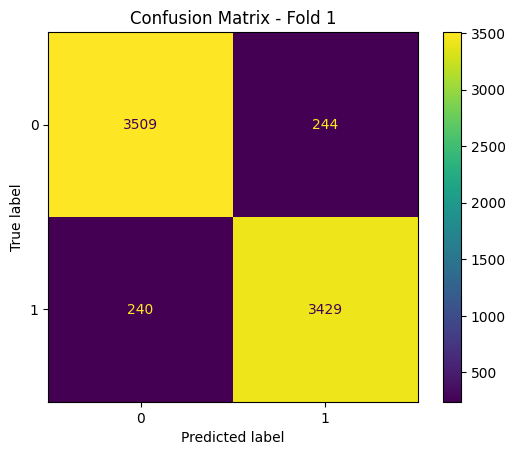

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
Specificity: 0.93
AUC: 0.99
Minority TPR: 0.93
Minority FPR: 0.06
Majoority TPR: 0.94
Majority FPR: 0.07
Fold 2:


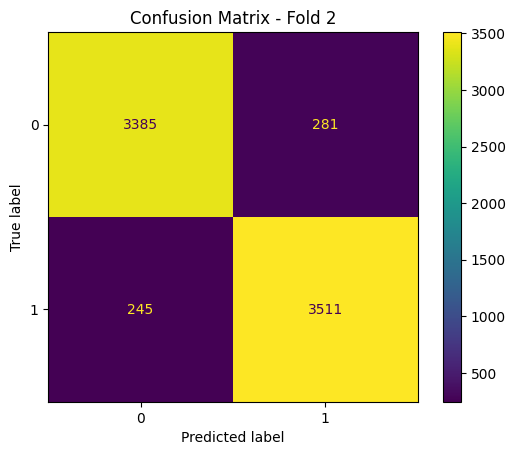

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
Specificity: 0.92
AUC: 0.99
Minority TPR: 0.93
Minority FPR: 0.07
Majoority TPR: 0.93
Majority FPR: 0.07
Fold 3:


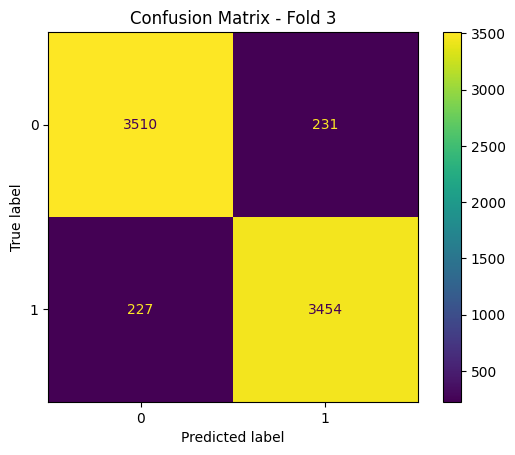

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
Specificity: 0.94
AUC: 0.99
Minority TPR: 0.94
Minority FPR: 0.06
Majoority TPR: 0.94
Majority FPR: 0.06
Fold 4:


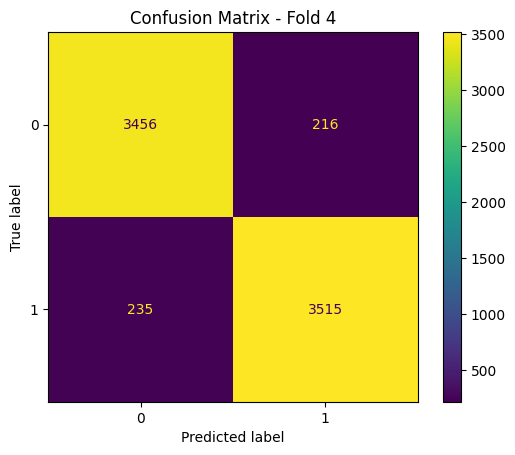

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
Specificity: 0.94
AUC: 0.99
Minority TPR: 0.94
Minority FPR: 0.06
Majoority TPR: 0.94
Majority FPR: 0.06
Fold 5:


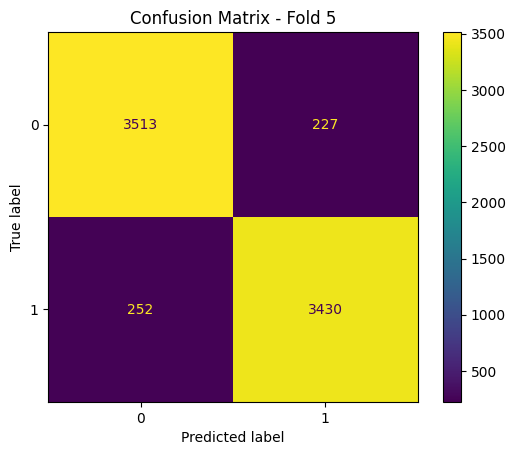

Accuracy: 0.94
Precision: 0.94
Recall: 0.93
Specificity: 0.94
AUC: 0.99
Minority TPR: 0.94
Minority FPR: 0.07
Majoority TPR: 0.93
Majority FPR: 0.06
Fold 6:


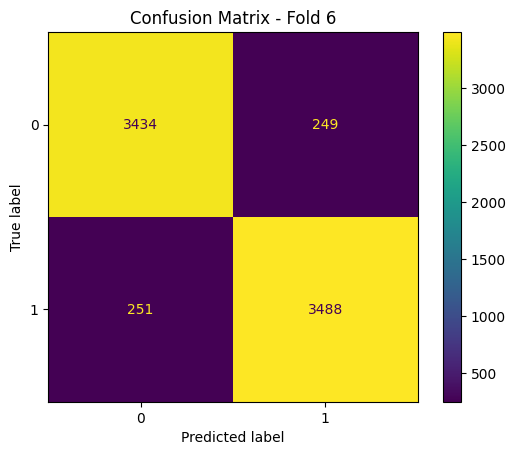

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
Specificity: 0.93
AUC: 0.99
Minority TPR: 0.93
Minority FPR: 0.07
Majoority TPR: 0.93
Majority FPR: 0.07
Fold 7:


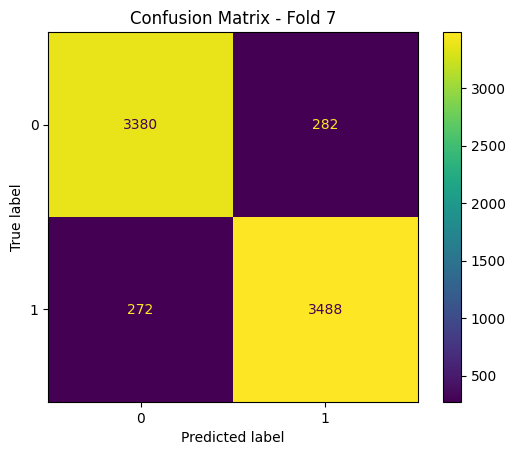

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
Specificity: 0.92
AUC: 0.98
Minority TPR: 0.93
Minority FPR: 0.07
Majoority TPR: 0.93
Majority FPR: 0.07
Fold 8:


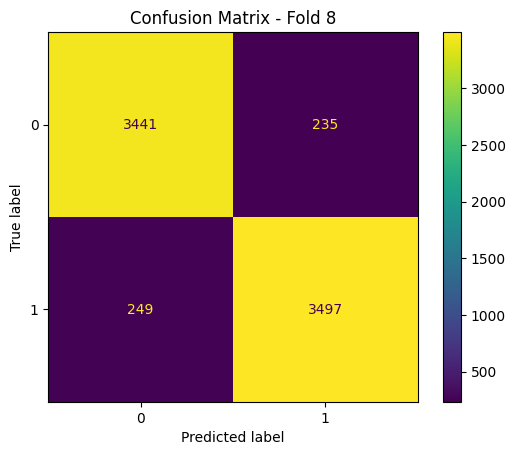

Accuracy: 0.93
Precision: 0.94
Recall: 0.93
Specificity: 0.94
AUC: 0.99
Minority TPR: 0.94
Minority FPR: 0.07
Majoority TPR: 0.93
Majority FPR: 0.06
Fold 9:


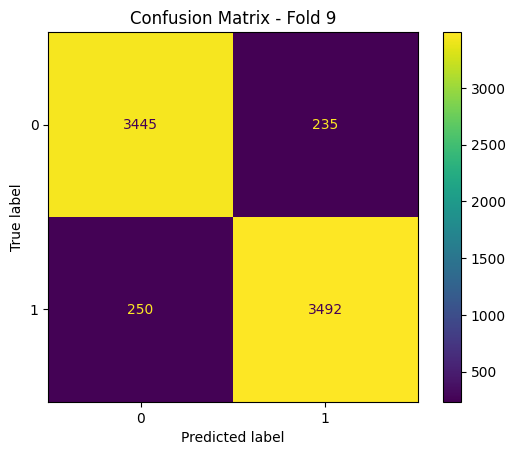

Accuracy: 0.93
Precision: 0.94
Recall: 0.93
Specificity: 0.94
AUC: 0.99
Minority TPR: 0.94
Minority FPR: 0.07
Majoority TPR: 0.93
Majority FPR: 0.06
Fold 10:


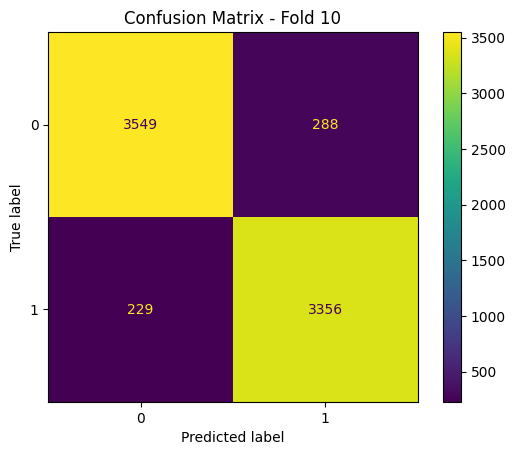

Accuracy: 0.93
Precision: 0.92
Recall: 0.94
Specificity: 0.92
AUC: 0.99
Minority TPR: 0.92
Minority FPR: 0.06
Majoority TPR: 0.94
Majority FPR: 0.08


In [ ]:
for i,(train_idx, val_idx) in enumerate(kf.split(independent_x)):
    print(f"Fold {i+1}:")
    X_train_fold, X_val_fold = independent_x.iloc[train_idx], independent_x.iloc[val_idx]
    y_train_fold, y_val_fold = dependent_y.iloc[train_idx], dependent_y.iloc[val_idx]

    model_xgb.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred_xgb = model_xgb.predict(X_val_fold)

    cm_xgb = confusion_matrix(y_val_fold, y_val_pred_xgb, labels=model_xgb.classes_)

    disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=model_xgb.classes_)

    disp_xgb.plot()
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.show()

    TP = cm_xgb[1,1]
    TN = cm_xgb[0,0]
    FP = cm_xgb[0,1]
    FN = cm_xgb[1,0]

    accuracy_xgb = model_xgb.score(X_val_fold, y_val_fold)
    precision_xgb = precision_score(y_val_fold, y_val_pred_xgb)
    recall_xgb = recall_score(y_val_fold, y_val_pred_xgb)
    specificity_xgb = TN / float(TN+FP)
    fpr_xgb, tpr_xgb, _ = roc_curve(y_val_fold, model_xgb.predict_proba(X_val_fold)[:, 1])

    # Interpolate the ROC curve at the mean_fpr points
    tpr_accumulated_xgb += np.interp(mean_fpr_xgb, fpr_xgb, tpr_xgb)
    tpr_accumulated_xgb[0] = 0.0

    minority_tpr_xgb = cm_xgb[1, 1] / (cm_xgb[1, 1] + cm_xgb[0, 1])
    majority_tpr_xgb = cm_xgb[0, 0] / (cm_xgb[0, 0] + cm_xgb[1, 0])
    minority_fpr_xgb = cm_xgb[1, 0] / (cm_xgb[1, 0] + cm_xgb[0, 0])
    majority_fpr_xgb = cm_xgb[0, 1] / (cm_xgb[0, 1] + cm_xgb[1, 1])


    print(f"Accuracy: {accuracy_xgb:.2f}")
    print(f"Precision: {precision_xgb:.2f}")
    print(f"Recall: {recall_xgb:.2f}")
    print(f"Specificity: {specificity_xgb:.2f}")
    print(f"AUC: {auc(fpr_xgb, tpr_xgb):.2f}")
    #print(f"Predictions on y_test: {y_val_pred_xgb}")

    print(f"Minority TPR: {minority_tpr_xgb:.2f}")
    print(f"Minority FPR: {minority_fpr_xgb:.2f}")
    print(f"Majoority TPR: {majority_tpr_xgb:.2f}")
    print(f"Majority FPR: {majority_fpr_xgb:.2f}")

    accuracy_xgb_list.append(accuracy_xgb)
    roc_auc_scores_xgb_list.append(auc(fpr_xgb, tpr_xgb))
    precisions_xgb_list.append(precision_xgb)
    recalls_xgb_list.append(recall_xgb)
    specificity_xgb_list.append(specificity_xgb)

    minority_tpr_scores_xgb_list.append(minority_tpr_xgb)
    minority_fpr_scores_xgb_list.append(minority_fpr_xgb)
    majority_tpr_scores_xgb_list.append(majority_tpr_xgb)
    majority_fpr_scores_xgb_list.append(majority_fpr_xgb)

In [ ]:
avg_accuracy_xgb = np.mean(accuracy_xgb_list)
avg_roc_auc_xgb = np.mean(roc_auc_scores_xgb_list)
avg_precision_xgb = np.mean(precisions_xgb_list)
avg_recall_xgb = np.mean(recalls_xgb_list)
avg_specificity_xgb = np.mean(specificity_xgb_list)
avg_minority_tpr_xgb = np.mean(minority_tpr_scores_xgb_list)
avg_minority_fpr_xgb = np.mean(minority_fpr_scores_xgb_list)
avg_majority_tpr_xgb = np.mean(majority_tpr_scores_xgb_list)
abg_majority_fpr_xgb = np.mean(majority_fpr_scores_xgb_list)

In [ ]:
print("Average Accuracy:", avg_accuracy_xgb)
print("Average ROC AUC Score:", avg_roc_auc_xgb)
print("Average Precision Score:", avg_precision_xgb)
print("Average Recall Score:", avg_recall_xgb)
print("Average Specificity:", avg_specificity_xgb)
print("Average Minority TPR:", avg_minority_tpr_xgb)
print("Average Minority FPR:", avg_minority_fpr_xgb)
print("Average Majority TPR:", avg_majority_tpr_xgb)
print("Average Majority FPR:", abg_majority_fpr_xgb)

Average Accuracy: 0.9355564537860414
Average ROC AUC Score: 0.9877419467346643
Average Precision Score: 0.9350000515164829
Average Recall Score: 0.9361436807714366
Average Specificity: 0.9349120791439622
Average Minority TPR: 0.9350000515164829
Average Minority FPR: 0.06385365624567649
Average Majority TPR: 0.9361463437543236
Average Majority FPR: 0.064999948483517


In [ ]:
# Calculate the mean true positive rate
mean_tpr_xgb = tpr_accumulated_xgb / kf.get_n_splits()

# Calculate the AUC for the mean ROC curve
mean_auc_xgb = auc(mean_fpr_xgb, mean_tpr_xgb)

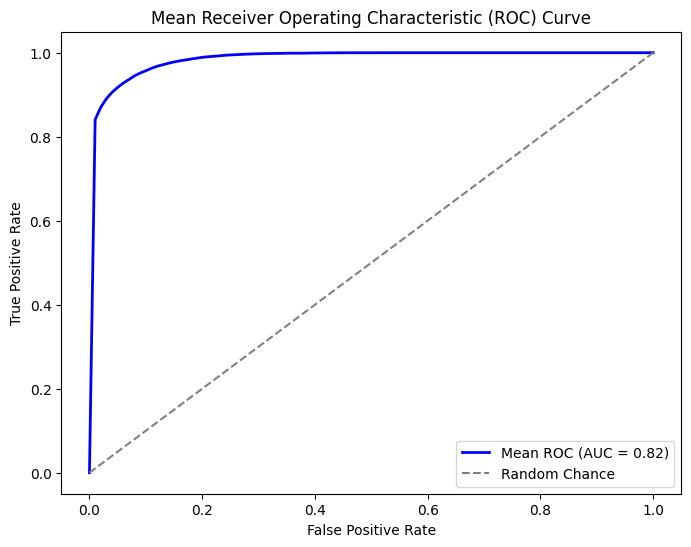

In [ ]:
# Plot the mean ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr_xgb, mean_tpr_xgb, color='b', label=f'Mean ROC (AUC = {mean_auc_nb:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
filename = 'xgboost_capstone.sav'
joblib.dump(model_xgb, filename)

['xgboost_capstone.sav']

# <h1>Logistic Regression</h1>

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42, C =10, penalty='l2', max_iter = 1000)

# Find best parameter LR



In [ ]:
model_lr = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter if needed

In [ ]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

In [ ]:
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, cv=10, scoring='roc_auc')

In [ ]:
grid_search_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [ ]:
best_params_lr = grid_search_lr.best_params_
print(best_params_lr)

{'C': 10, 'penalty': 'l2'}


In [ ]:
best_lr_model = grid_search_lr.best_estimator_

In [ ]:
joblib.dump(best_lr_model, '/content/drive/MyDrive/Colab Notebooks/Capstone/best_lr_capstone.sav')

['/content/drive/MyDrive/Colab Notebooks/Capstone/best_lr_capstone.sav']

# Stratified K fold LR

In [ ]:
weights_lr = {0: 1, 1: 70}
model_lr = LogisticRegression(random_state=42, C =10, penalty='l2', max_iter = 1000)

In [ ]:
accuracy_lr_list = []
roc_auc_scores_lr_list = []
precisions_lr_list = []
recalls_lr_list = []
specificity_lr_list = []

minority_tpr_scores_lr_list = []
majority_tpr_scores_lr_list = []
minority_fpr_scores_lr_list = []
majority_fpr_scores_lr_list = []

mean_fpr_lr = np.linspace(0, 1, 100)
tpr_accumulated_lr = 0

Fold 1:


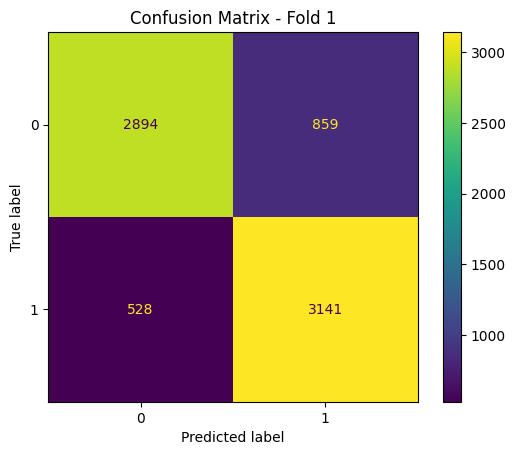

Accuracy: 0.81
Precision: 0.79
Recall: 0.86
Specificity: 0.77
AUC: 0.89
Minority TPR: 0.79
Minority FPR: 0.15
Majoority TPR: 0.85
Majority FPR: 0.21
Fold 2:


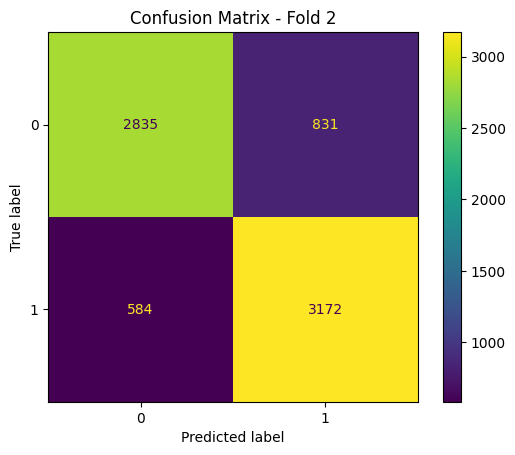

Accuracy: 0.81
Precision: 0.79
Recall: 0.84
Specificity: 0.77
AUC: 0.89
Minority TPR: 0.79
Minority FPR: 0.17
Majoority TPR: 0.83
Majority FPR: 0.21
Fold 3:


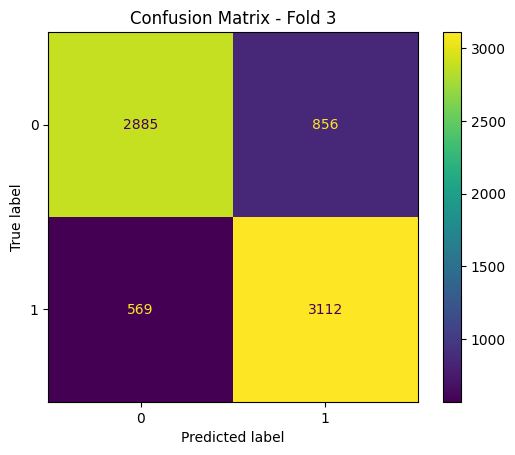

Accuracy: 0.81
Precision: 0.78
Recall: 0.85
Specificity: 0.77
AUC: 0.89
Minority TPR: 0.78
Minority FPR: 0.16
Majoority TPR: 0.84
Majority FPR: 0.22
Fold 4:


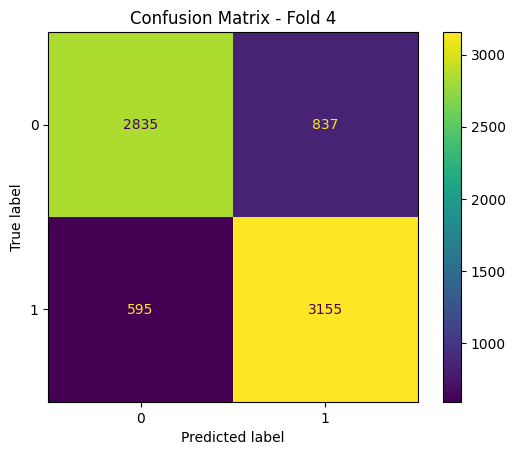

Accuracy: 0.81
Precision: 0.79
Recall: 0.84
Specificity: 0.77
AUC: 0.89
Minority TPR: 0.79
Minority FPR: 0.17
Majoority TPR: 0.83
Majority FPR: 0.21
Fold 5:


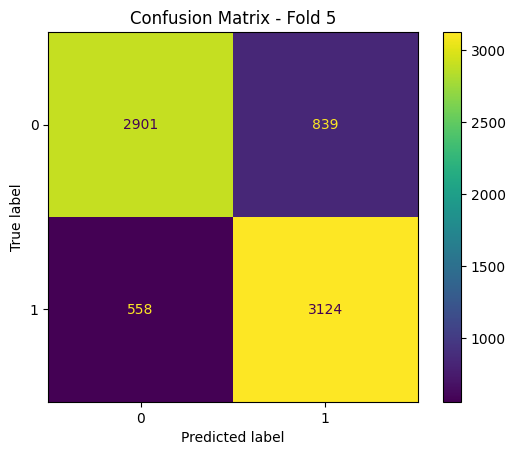

Accuracy: 0.81
Precision: 0.79
Recall: 0.85
Specificity: 0.78
AUC: 0.89
Minority TPR: 0.79
Minority FPR: 0.16
Majoority TPR: 0.84
Majority FPR: 0.21
Fold 6:


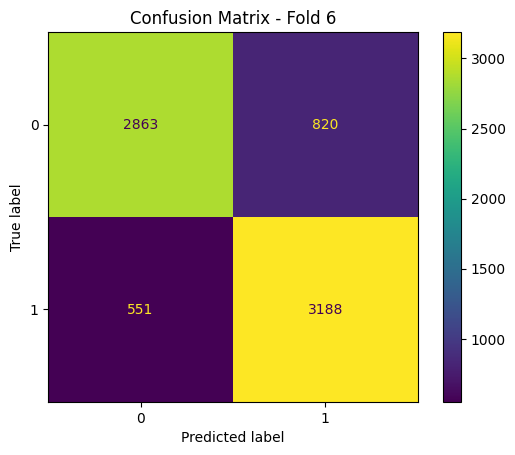

Accuracy: 0.82
Precision: 0.80
Recall: 0.85
Specificity: 0.78
AUC: 0.89
Minority TPR: 0.80
Minority FPR: 0.16
Majoority TPR: 0.84
Majority FPR: 0.20
Fold 7:


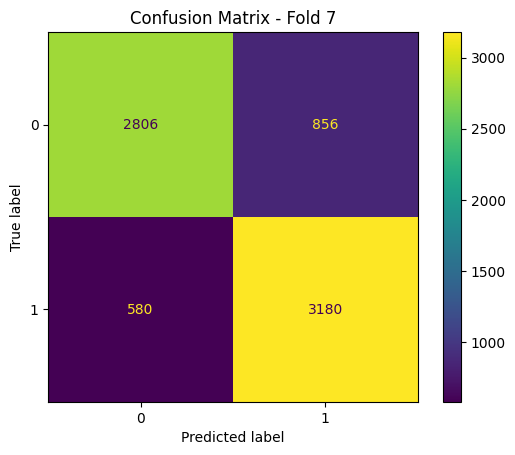

Accuracy: 0.81
Precision: 0.79
Recall: 0.85
Specificity: 0.77
AUC: 0.88
Minority TPR: 0.79
Minority FPR: 0.17
Majoority TPR: 0.83
Majority FPR: 0.21
Fold 8:


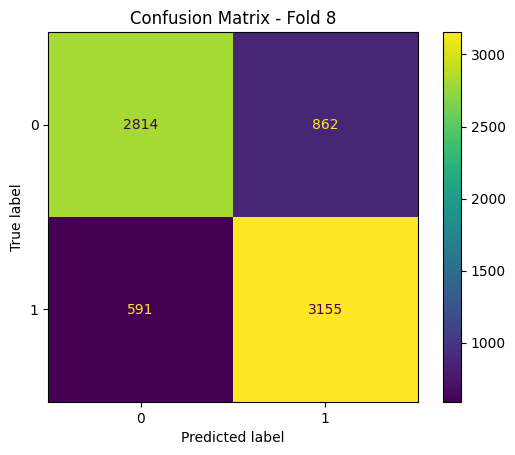

Accuracy: 0.80
Precision: 0.79
Recall: 0.84
Specificity: 0.77
AUC: 0.88
Minority TPR: 0.79
Minority FPR: 0.17
Majoority TPR: 0.83
Majority FPR: 0.21
Fold 9:


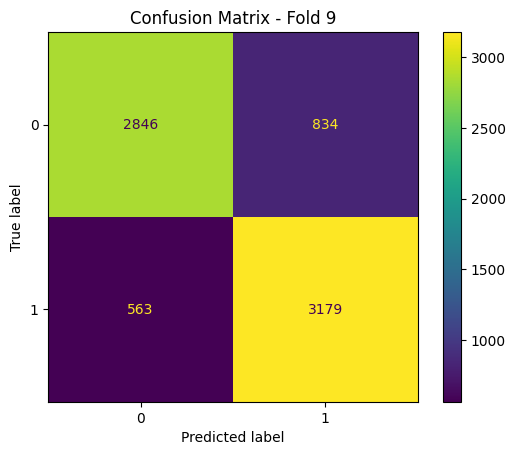

Accuracy: 0.81
Precision: 0.79
Recall: 0.85
Specificity: 0.77
AUC: 0.88
Minority TPR: 0.79
Minority FPR: 0.17
Majoority TPR: 0.83
Majority FPR: 0.21
Fold 10:


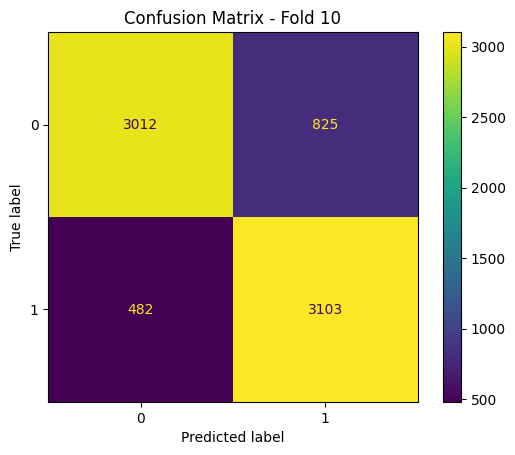

Accuracy: 0.82
Precision: 0.79
Recall: 0.87
Specificity: 0.78
AUC: 0.89
Minority TPR: 0.79
Minority FPR: 0.14
Majoority TPR: 0.86
Majority FPR: 0.21


In [ ]:
for i,(train_idx, val_idx) in enumerate(kf.split(independent_x)):
    print(f"Fold {i+1}:")
    X_train_fold, X_val_fold = independent_x.iloc[train_idx], independent_x.iloc[val_idx]
    y_train_fold, y_val_fold = dependent_y.iloc[train_idx], dependent_y.iloc[val_idx]

    model_lr.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred_lr = model_lr.predict(X_val_fold)

    cm_lr = confusion_matrix(y_val_fold, y_val_pred_lr, labels=model_lr.classes_)

    disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr,display_labels=model_lr.classes_)

    disp_lr.plot()
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.show()

    TP = cm_lr[1,1]
    TN = cm_lr[0,0]
    FP = cm_lr[0,1]
    FN = cm_lr[1,0]

    accuracy_lr = model_lr.score(X_val_fold, y_val_fold)
    precision_lr = precision_score(y_val_fold, y_val_pred_lr)
    recall_lr = recall_score(y_val_fold, y_val_pred_lr)
    specificity_lr = TN / float(TN+FP)
    fpr_lr, tpr_lr, _ = roc_curve(y_val_fold, model_lr.predict_proba(X_val_fold)[:, 1])

    # Interpolate the ROC curve at the mean_fpr points
    tpr_accumulated_lr += np.interp(mean_fpr_lr, fpr_lr, tpr_lr)
    tpr_accumulated_lr[0] = 0.0

    minority_tpr_lr = cm_lr[1, 1] / (cm_lr[1, 1] + cm_lr[0, 1])
    majority_tpr_lr = cm_lr[0, 0] / (cm_lr[0, 0] + cm_lr[1, 0])
    minority_fpr_lr = cm_lr[1, 0] / (cm_lr[1, 0] + cm_lr[0, 0])
    majority_fpr_lr = cm_lr[0, 1] / (cm_lr[0, 1] + cm_lr[1, 1])

    print(f"Accuracy: {accuracy_lr:.2f}")
    print(f"Precision: {precision_lr:.2f}")
    print(f"Recall: {recall_lr:.2f}")
    print(f"Specificity: {specificity_lr:.2f}")
    print(f"AUC: {auc(fpr_lr, tpr_lr):.2f}")
    # print(f"Predictions on y_test: {y_val_pred_lr}")

    print(f"Minority TPR: {minority_tpr_lr:.2f}")
    print(f"Minority FPR: {minority_fpr_lr:.2f}")
    print(f"Majoority TPR: {majority_tpr_lr:.2f}")
    print(f"Majority FPR: {majority_fpr_lr:.2f}")

    accuracy_lr_list.append(accuracy_lr)
    roc_auc_scores_lr_list.append(auc(fpr_lr, tpr_lr))
    precisions_lr_list.append(precision_lr)
    recalls_lr_list.append(recall_lr)
    specificity_lr_list.append(specificity_lr)

    minority_tpr_scores_lr_list.append(minority_tpr_lr)
    minority_fpr_scores_lr_list.append(minority_fpr_lr)
    majority_tpr_scores_lr_list.append(majority_tpr_lr)
    majority_fpr_scores_lr_list.append(majority_fpr_lr)

In [ ]:
avg_accuracy_lr = np.mean(accuracy_lr_list)
avg_roc_auc_lr = np.mean(roc_auc_scores_lr_list)
avg_precision_lr = np.mean(precisions_lr_list)
avg_recall_lr = np.mean(recalls_lr_list)
avg_specificity_lr = np.mean(specificity_lr_list)

avg_minority_tpr_lr = np.mean(minority_tpr_scores_lr_list)
avg_minority_fpr_lr = np.mean(minority_fpr_scores_lr_list)
avg_majority_tpr_lr = np.mean(majority_tpr_scores_lr_list)
abg_majority_fpr_lr = np.mean(majority_fpr_scores_lr_list)

In [ ]:
print("Average Accuracy:", avg_accuracy_lr)
print("Average ROC AUC Score:", avg_roc_auc_lr)
print("Average Precision Score:", avg_precision_lr)
print("Average Recall Score:", avg_recall_lr)
print("Average Specificity:", avg_specificity_lr)

print("Average Minority TPR:", avg_minority_tpr_lr)
print("Average Minority FPR:", avg_minority_fpr_lr)
print("Average Majority TPR:", avg_majority_tpr_lr)
print("Average Majority FPR:", abg_majority_fpr_lr)

Average Accuracy: 0.8108730800323365
Average ROC AUC Score: 0.8862823759687384
Average Precision Score: 0.789368718600809
Average Recall Score: 0.8480449023907539
Average Specificity: 0.7736718549892379
Average Minority TPR: 0.789368718600809
Average Minority FPR: 0.16423000141099647
Average Majority TPR: 0.8357699985890035
Average Majority FPR: 0.210631281399191


In [ ]:
# Calculate the mean true positive rate
mean_tpr_lr = tpr_accumulated_lr / kf.get_n_splits()

# Calculate the AUC for the mean ROC curve
mean_auc_lr = auc(mean_fpr_lr, mean_tpr_lr)

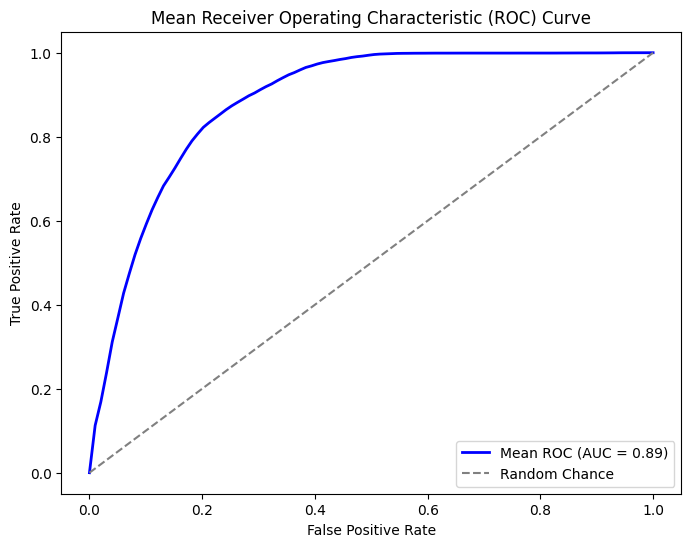

In [ ]:
# Plot the mean ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr_lr, mean_tpr_lr, color='b', label=f'Mean ROC (AUC = {mean_auc_lr:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# <h1>Stacking</h1>

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

weights = {0: 1, 1: 70}
base_estimator = DecisionTreeClassifier(random_state=42, class_weight=weights, criterion= 'entropy', max_depth = 5, min_samples_leaf=2,min_samples_split=2)

nb_model = GaussianNB()
model_rf = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42)
model_dt = DecisionTreeClassifier(random_state=42,  criterion= 'entropy', min_samples_leaf=4 ,min_samples_split=10)
model_xgb = XGBClassifier(random_state=42, learning_rate= 0.1, max_depth= 5, n_estimators= 300)
model_lr =  LogisticRegression(random_state=42, C =10, penalty='l2', max_iter = 1000)

models= [("DecisionTree", model_dt), ("XGBoost", model_xgb), ("LogisticRegression",model_lr)]
# model_stk= StackingClassifier(estimators=models, final_estimator= nb_model, cv = 10)

In [ ]:
accuracy_stk_list = []
roc_auc_scores_stk_list = []
precisions_stk_list = []
recalls_stk_list = []
specificity_stk_list = []


minority_tpr_scores_stk_list = []
majority_tpr_scores_stk_list = []
minority_fpr_scores_stk_list = []
majority_fpr_scores_stk_list = []

mean_fpr_stk = np.linspace(0, 1, 100)
tpr_accumulated_stk = 0

In [ ]:
model_stk= StackingClassifier(estimators=models, final_estimator= model_xgb)

Fold 1:


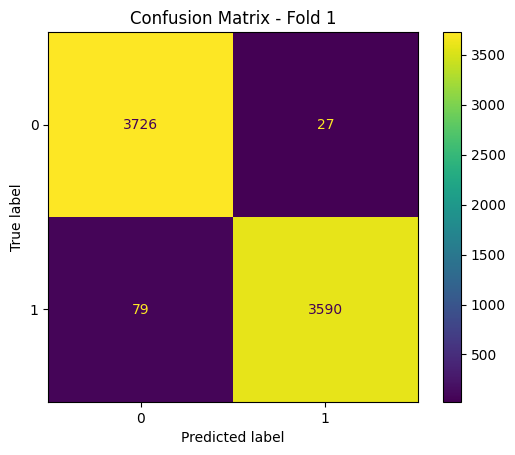

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 2:


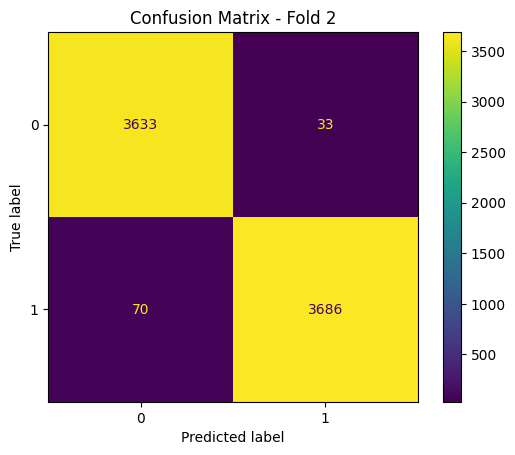

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 3:


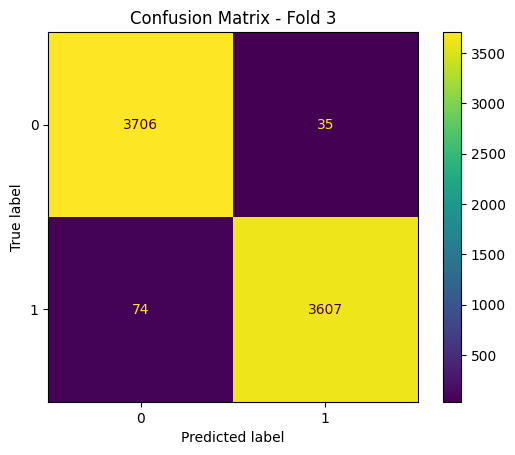

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 4:


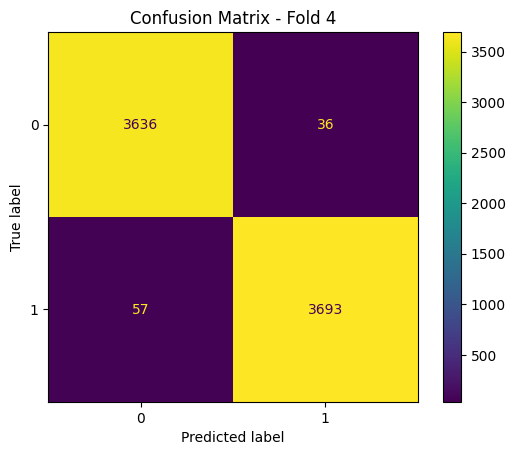

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 5:


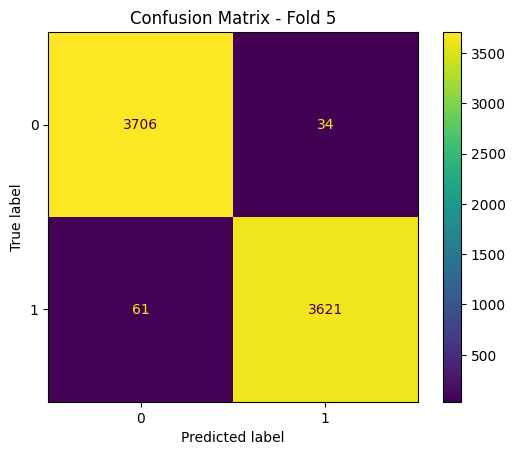

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 6:


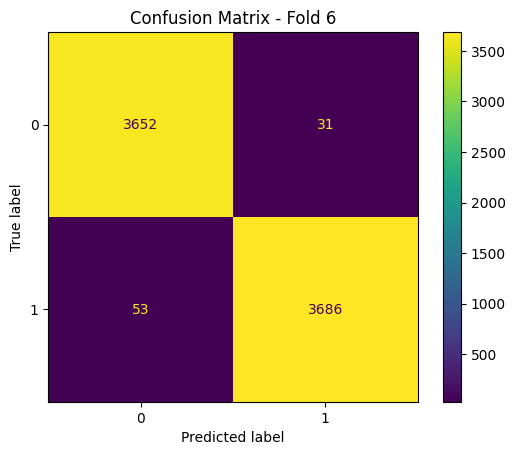

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.01
Fold 7:


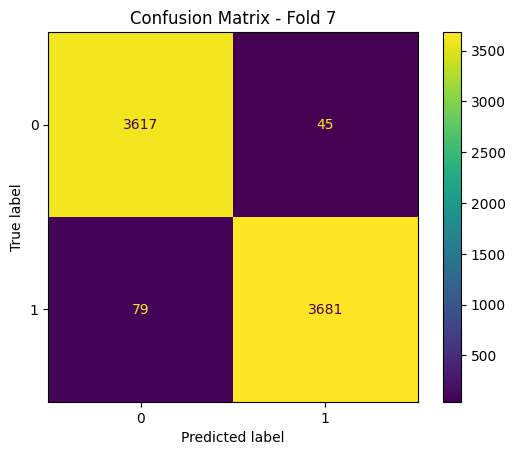

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 8:


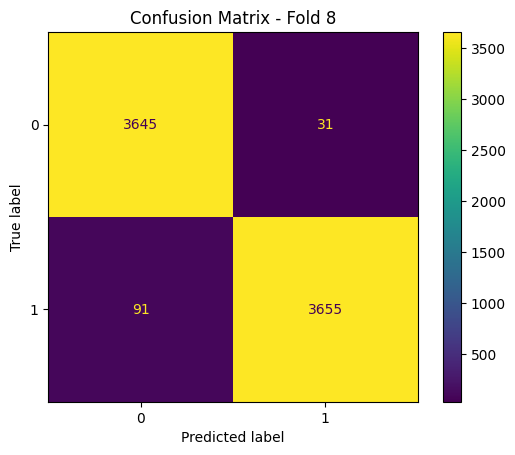

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 9:


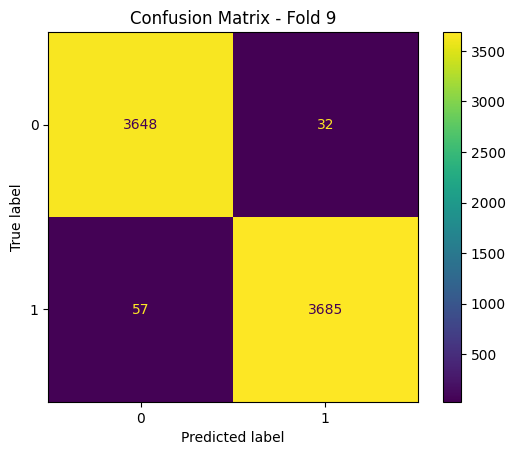

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 10:


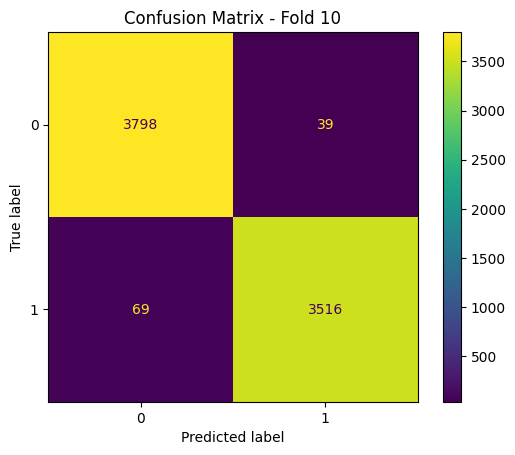

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01


In [ ]:
for i,(train_idx, val_idx) in enumerate(kf.split(independent_x, dependent_y)):
    print(f"Fold {i+1}:")
    X_train_fold, X_val_fold = independent_x.iloc[train_idx], independent_x.iloc[val_idx]
    y_train_fold, y_val_fold = dependent_y.iloc[train_idx], dependent_y.iloc[val_idx]

    model_stk.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred_stk = model_stk.predict(X_val_fold)

    cm_stk = confusion_matrix(y_val_fold, y_val_pred_stk, labels=model_stk.classes_)

    disp_stk = ConfusionMatrixDisplay(confusion_matrix=cm_stk,display_labels=model_stk.classes_)

    disp_stk.plot()
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.show()

    TP = cm_stk[1,1]
    TN = cm_stk[0,0]
    FP = cm_stk[0,1]
    FN = cm_stk[1,0]

    accuracy_stk = model_stk.score(X_val_fold, y_val_fold)
    precision_stk = precision_score(y_val_fold, y_val_pred_stk)
    recall_stk = recall_score(y_val_fold, y_val_pred_stk)
    specificity_stk = TN / float(TN+FP)
    fpr_stk, tpr_stk, _ = roc_curve(y_val_fold, model_stk.predict_proba(X_val_fold)[:, 1])

    # Interpolate the ROC curve at the mean_fpr points
    tpr_accumulated_stk += np.interp(mean_fpr_stk, fpr_stk, tpr_stk)
    tpr_accumulated_stk[0] = 0.0

    minority_tpr_stk = cm_stk[1, 1] / (cm_stk[1, 1] + cm_stk[0, 1])
    majority_tpr_stk = cm_stk[0, 0] / (cm_stk[0, 0] + cm_stk[1, 0])
    minority_fpr_stk = cm_stk[1, 0] / (cm_stk[1, 0] + cm_stk[0, 0])
    majority_fpr_stk = cm_stk[0, 1] / (cm_stk[0, 1] + cm_stk[1, 1])

    print(f"Accuracy: {accuracy_stk:.2f}")
    print(f"Precision: {precision_stk:.2f}")
    print(f"Recall: {recall_stk:.2f}")
    print(f"Specificity: {specificity_stk:.2f}")
    print(f"AUC: {auc(fpr_stk, tpr_stk):.2f}")

    print(f"Minority TPR: {minority_tpr_stk:.2f}")
    print(f"Minority FPR: {minority_fpr_stk:.2f}")
    print(f"Majoority TPR: {majority_tpr_stk:.2f}")
    print(f"Majority FPR: {majority_fpr_stk:.2f}")

    accuracy_stk_list.append(accuracy_stk)
    roc_auc_scores_stk_list.append(auc(fpr_stk, tpr_stk))
    precisions_stk_list.append(precision_stk)
    recalls_stk_list.append(recall_stk)
    specificity_stk_list.append(specificity_stk)

    minority_tpr_scores_stk_list.append(minority_tpr_stk)
    minority_fpr_scores_stk_list.append(minority_fpr_stk)
    majority_tpr_scores_stk_list.append(majority_tpr_stk)
    majority_fpr_scores_stk_list.append(majority_fpr_stk)

In [ ]:
avg_accuracy_stk = np.mean(accuracy_stk_list)
avg_roc_auc_stk = np.mean(roc_auc_scores_stk_list)
avg_precision_stk = np.mean(precisions_stk_list)
avg_recall_stk = np.mean(recalls_stk_list)
avg_specificity_stk = np.mean(specificity_stk_list)

avg_minority_tpr_stk = np.mean(minority_tpr_scores_stk_list)
avg_minority_fpr_stk = np.mean(minority_fpr_scores_stk_list)
avg_majority_tpr_stk = np.mean(majority_tpr_scores_stk_list)
abg_majority_fpr_stk = np.mean(majority_fpr_scores_stk_list)

In [ ]:
print("Average Accuracy:", avg_accuracy_stk)
print("Average ROC AUC Score:", avg_roc_auc_stk)
print("Average Precision Score:", avg_precision_stk)
print("Average Recall Score:", avg_recall_stk)
print("Average Specificity:", avg_specificity_stk)

print("Average Minority TPR:", avg_minority_tpr_stk)
print("Average Minority FPR:", avg_minority_fpr_stk)
print("Average Majority TPR:", avg_majority_tpr_stk)
print("Average Majority FPR:", abg_majority_fpr_stk)

Average Accuracy: 0.985691188358933
Average ROC AUC Score: 0.9978398246624629
Average Precision Score: 0.9893264036096664
Average Recall Score: 0.9819699478171688
Average Specificity: 0.9894136076154089
Average Minority TPR: 0.9893264036096664
Average Minority FPR: 0.017894867131262718
Average Majority TPR: 0.9821051328687374
Average Majority FPR: 0.010673596390333516


In [ ]:
# Calculate the mean true positive rate
mean_tpr_stk = tpr_accumulated_stk / kf.get_n_splits()

# Calculate the AUC for the mean ROC curve
mean_auc_stk = auc(mean_fpr_stk, mean_tpr_stk)


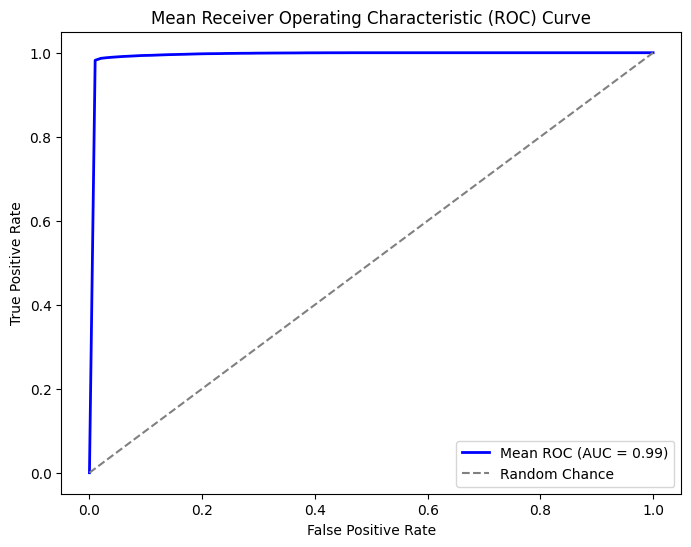

In [ ]:
# Plot the mean ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr_stk, mean_tpr_stk, color='b', label=f'Mean ROC (AUC = {mean_auc_stk:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
filename = 'stacking_capstone.sav'
joblib.dump(model_stk, filename)

['stackingt_capstone.sav']

# meta classifier (dt)

In [ ]:
from sklearn.ensemble import StackingClassifier
models_2= [("DecisionTree", model_dt), ("XGBoost", model_xgb), ("RandomForest",model_rf)]

In [ ]:
accuracy_stk_list = []
roc_auc_scores_stk_list = []
precisions_stk_list = []
recalls_stk_list = []
specificity_stk_list = []


minority_tpr_scores_stk_list = []
majority_tpr_scores_stk_list = []
minority_fpr_scores_stk_list = []
majority_fpr_scores_stk_list = []

mean_fpr_stk = np.linspace(0, 1, 100)
tpr_accumulated_stk = 0

In [ ]:
model_stk_2 = StackingClassifier(estimators=models_2, final_estimator= model_dt)

Fold 1:


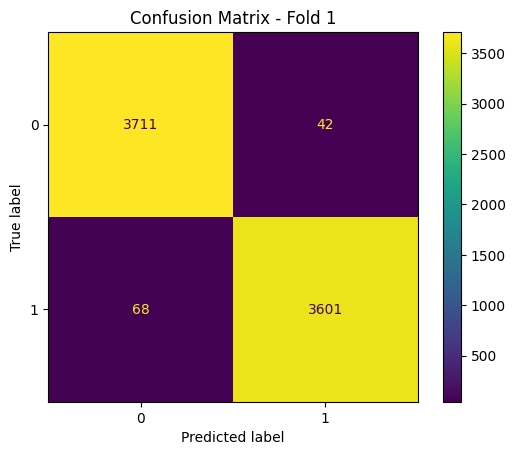

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 2:


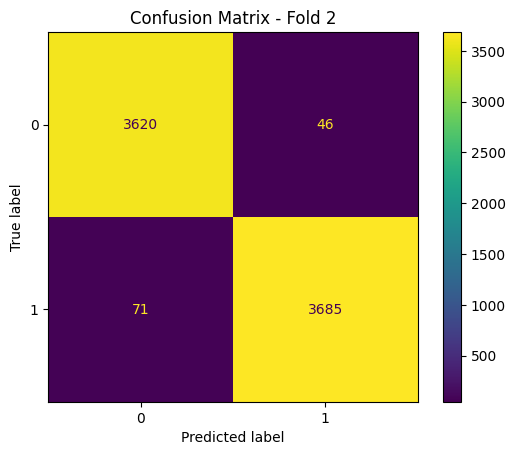

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 3:


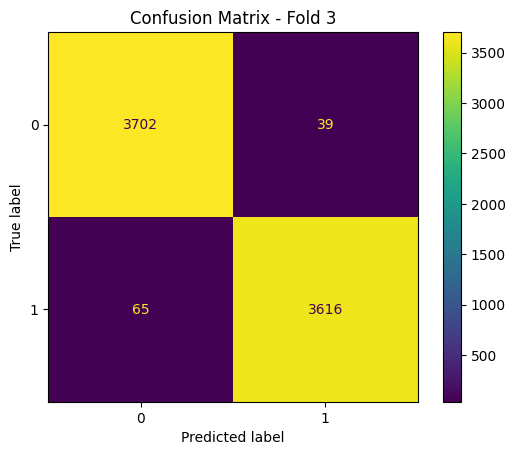

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 4:


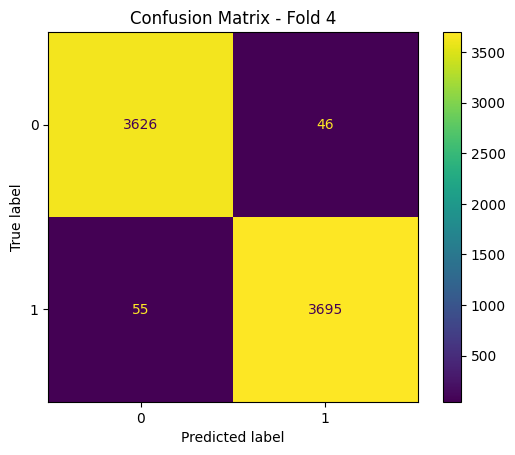

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.01
Fold 5:


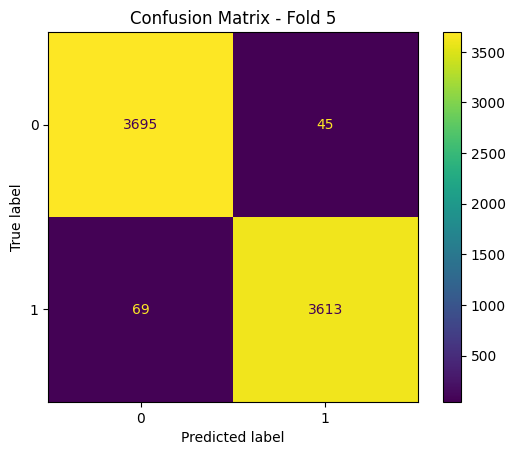

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 6:


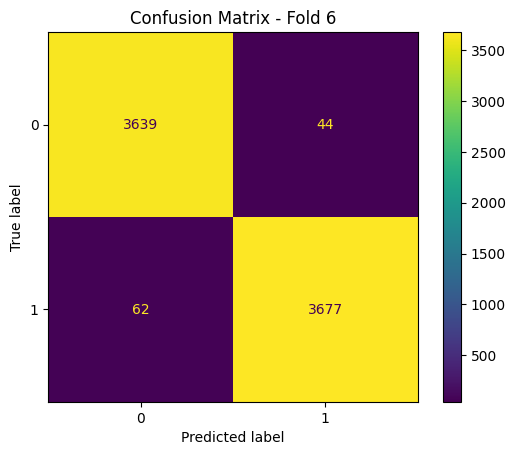

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 7:


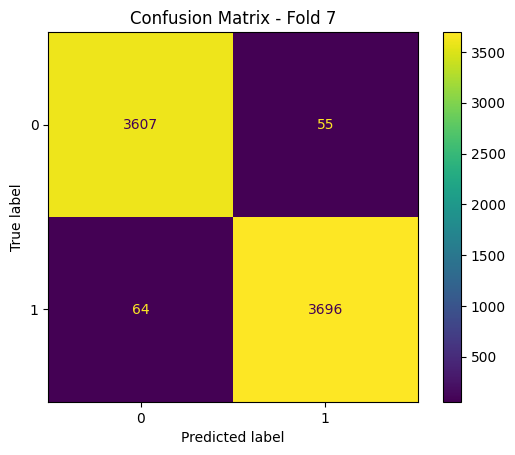

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
Specificity: 0.98
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 8:


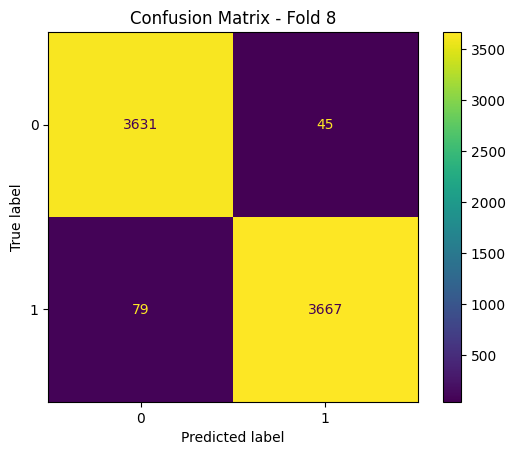

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 9:


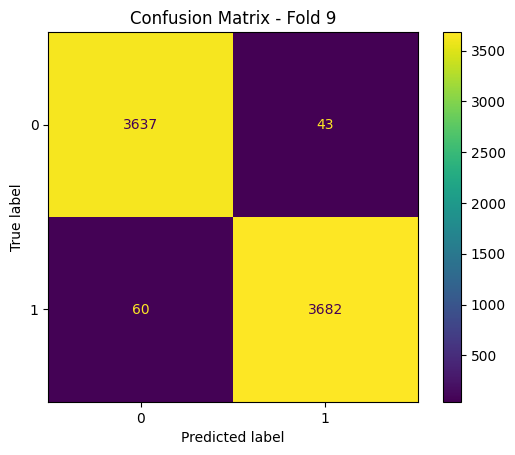

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 10:


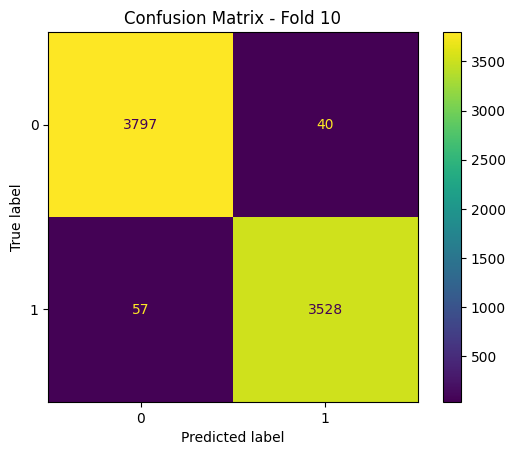

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 0.99
Minority TPR: 0.99
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.01


In [ ]:
for i,(train_idx, val_idx) in enumerate(kf.split(independent_x, dependent_y)):
    print(f"Fold {i+1}:")
    X_train_fold, X_val_fold = independent_x.iloc[train_idx], independent_x.iloc[val_idx]
    y_train_fold, y_val_fold = dependent_y.iloc[train_idx], dependent_y.iloc[val_idx]

    model_stk_2.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred_stk = model_stk_2.predict(X_val_fold)

    cm_stk = confusion_matrix(y_val_fold, y_val_pred_stk, labels=model_stk_2.classes_)

    disp_stk = ConfusionMatrixDisplay(confusion_matrix=cm_stk,display_labels=model_stk_2.classes_)

    disp_stk.plot()
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.show()

    TP = cm_stk[1,1]
    TN = cm_stk[0,0]
    FP = cm_stk[0,1]
    FN = cm_stk[1,0]

    accuracy_stk = model_stk_2.score(X_val_fold, y_val_fold)
    precision_stk = precision_score(y_val_fold, y_val_pred_stk)
    recall_stk = recall_score(y_val_fold, y_val_pred_stk)
    specificity_stk = TN / float(TN+FP)
    fpr_stk, tpr_stk, _ = roc_curve(y_val_fold, model_stk_2.predict_proba(X_val_fold)[:, 1])

    # Interpolate the ROC curve at the mean_fpr points
    tpr_accumulated_stk += np.interp(mean_fpr_stk, fpr_stk, tpr_stk)
    tpr_accumulated_stk[0] = 0.0

    minority_tpr_stk = cm_stk[1, 1] / (cm_stk[1, 1] + cm_stk[0, 1])
    majority_tpr_stk = cm_stk[0, 0] / (cm_stk[0, 0] + cm_stk[1, 0])
    minority_fpr_stk = cm_stk[1, 0] / (cm_stk[1, 0] + cm_stk[0, 0])
    majority_fpr_stk = cm_stk[0, 1] / (cm_stk[0, 1] + cm_stk[1, 1])

    print(f"Accuracy: {accuracy_stk:.2f}")
    print(f"Precision: {precision_stk:.2f}")
    print(f"Recall: {recall_stk:.2f}")
    print(f"Specificity: {specificity_stk:.2f}")
    print(f"AUC: {auc(fpr_stk, tpr_stk):.2f}")

    print(f"Minority TPR: {minority_tpr_stk:.2f}")
    print(f"Minority FPR: {minority_fpr_stk:.2f}")
    print(f"Majoority TPR: {majority_tpr_stk:.2f}")
    print(f"Majority FPR: {majority_fpr_stk:.2f}")

    accuracy_stk_list.append(accuracy_stk)
    roc_auc_scores_stk_list.append(auc(fpr_stk, tpr_stk))
    precisions_stk_list.append(precision_stk)
    recalls_stk_list.append(recall_stk)
    specificity_stk_list.append(specificity_stk)

    minority_tpr_scores_stk_list.append(minority_tpr_stk)
    minority_fpr_scores_stk_list.append(minority_fpr_stk)
    majority_tpr_scores_stk_list.append(majority_tpr_stk)
    majority_fpr_scores_stk_list.append(majority_fpr_stk)

In [ ]:
avg_accuracy_stk = np.mean(accuracy_stk_list)
avg_roc_auc_stk = np.mean(roc_auc_scores_stk_list)
avg_precision_stk = np.mean(precisions_stk_list)
avg_recall_stk = np.mean(recalls_stk_list)
avg_specificity_stk = np.mean(specificity_stk_list)

avg_minority_tpr_stk = np.mean(minority_tpr_scores_stk_list)
avg_minority_fpr_stk = np.mean(minority_fpr_scores_stk_list)
avg_majority_tpr_stk = np.mean(majority_tpr_scores_stk_list)
abg_majority_fpr_stk = np.mean(majority_fpr_scores_stk_list)

In [ ]:
print("Average Accuracy:", avg_accuracy_stk)
print("Average ROC AUC Score:", avg_roc_auc_stk)
print("Average Precision Score:", avg_precision_stk)
print("Average Recall Score:", avg_recall_stk)
print("Average Specificity:", avg_specificity_stk)

print("Average Minority TPR:", avg_minority_tpr_stk)
print("Average Minority FPR:", avg_minority_fpr_stk)
print("Average Majority TPR:", avg_majority_tpr_stk)
print("Average Majority FPR:", abg_majority_fpr_stk)

Average Accuracy: 0.9852465642683914
Average ROC AUC Score: 0.9927878349073225
Average Precision Score: 0.98795088434721
Average Recall Score: 0.9824872324128797
Average Specificity: 0.9879959819829267
Average Minority TPR: 0.98795088434721
Average Minority FPR: 0.017425759734730248
Average Majority TPR: 0.9825742402652697
Average Majority FPR: 0.012049115652789866


In [ ]:
# Calculate the mean true positive rate
mean_tpr_stk = tpr_accumulated_stk / kf.get_n_splits()

# Calculate the AUC for the mean ROC curve
mean_auc_stk = auc(mean_fpr_stk, mean_tpr_stk)

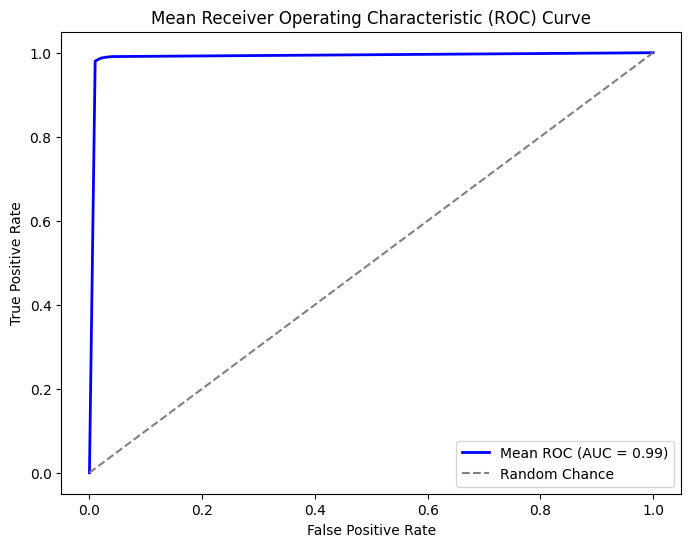

In [ ]:
# Plot the mean ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr_stk, mean_tpr_stk, color='b', label=f'Mean ROC (AUC = {mean_auc_stk:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# meta classifier (RF)

In [ ]:
accuracy_stk_list = []
roc_auc_scores_stk_list = []
precisions_stk_list = []
recalls_stk_list = []
specificity_stk_list = []


minority_tpr_scores_stk_list = []
majority_tpr_scores_stk_list = []
minority_fpr_scores_stk_list = []
majority_fpr_scores_stk_list = []

mean_fpr_stk = np.linspace(0, 1, 100)
tpr_accumulated_stk = 0

In [ ]:
model_stk_3 = StackingClassifier(estimators=models_2, final_estimator= model_rf)

Fold 1:


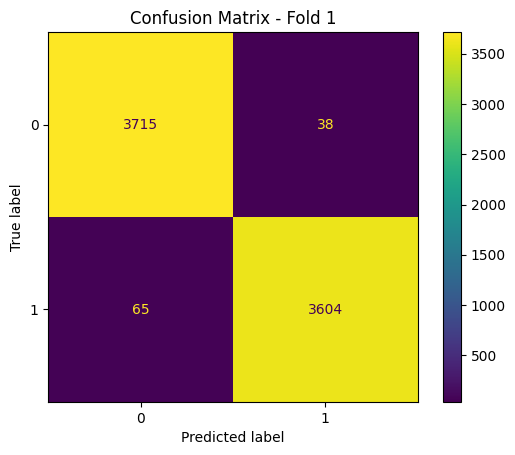

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 2:


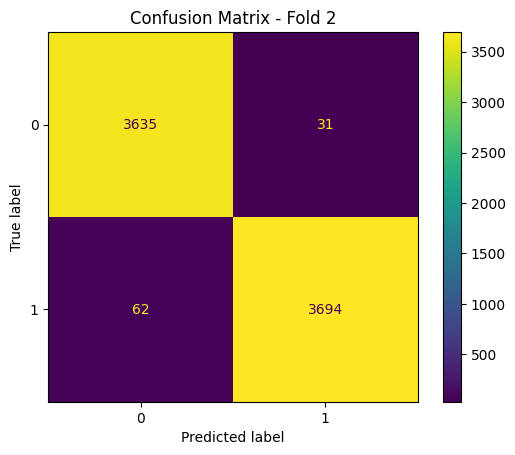

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 3:


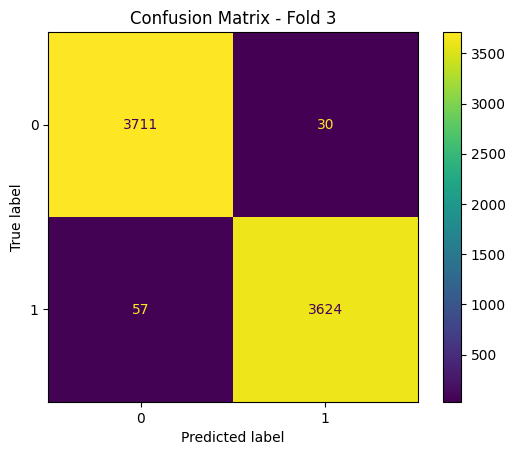

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 4:


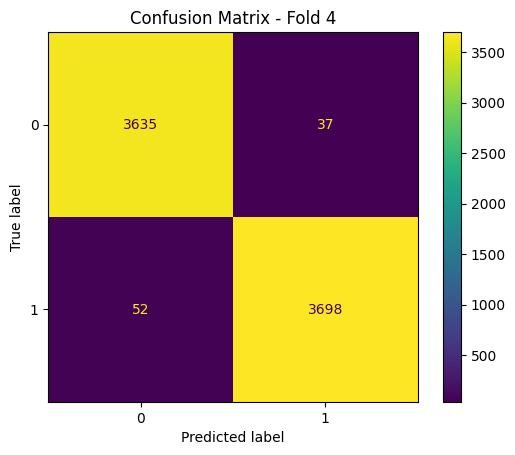

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.01
Fold 5:


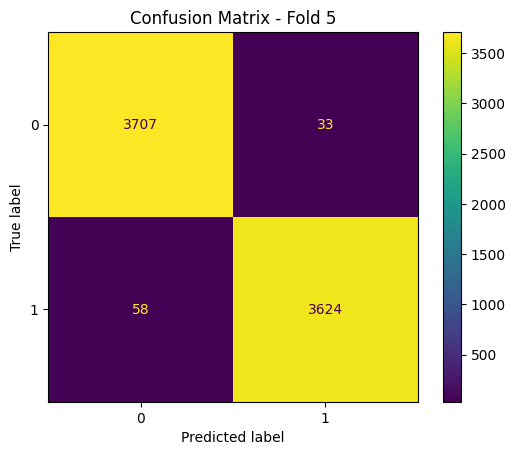

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 6:


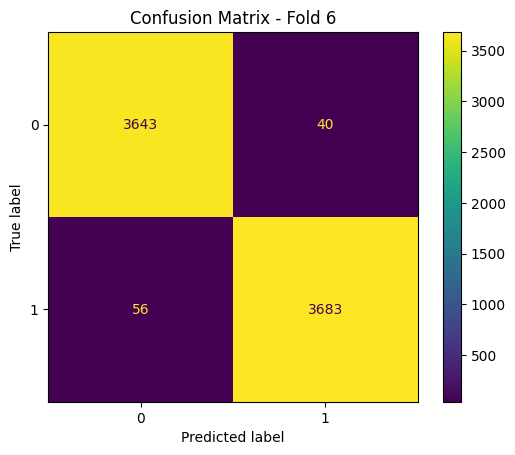

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 7:


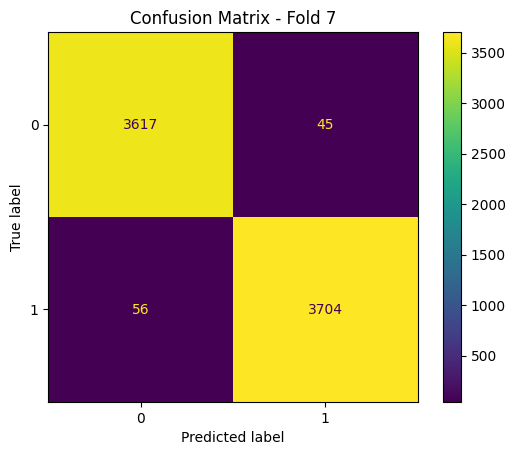

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 8:


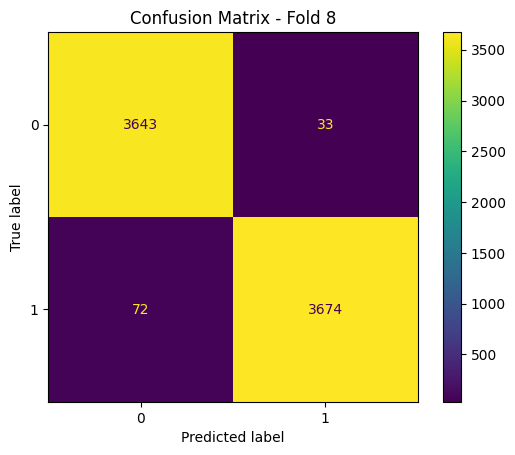

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 9:


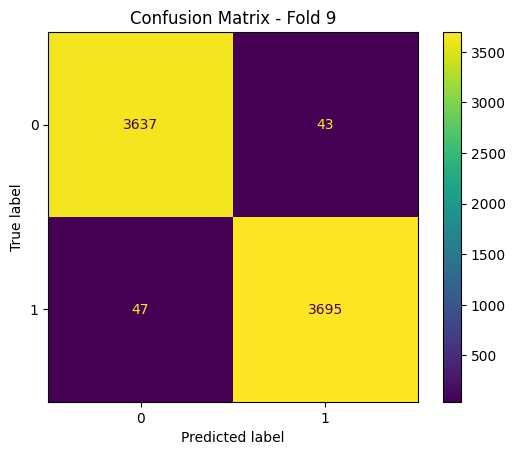

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.01
Fold 10:


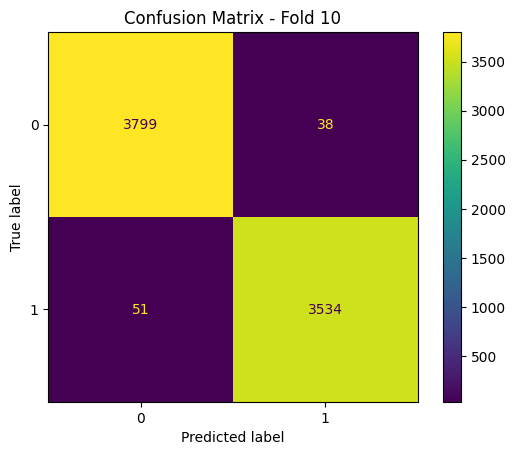

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.01


In [ ]:
for i,(train_idx, val_idx) in enumerate(kf.split(independent_x, dependent_y)):
    print(f"Fold {i+1}:")
    X_train_fold, X_val_fold = independent_x.iloc[train_idx], independent_x.iloc[val_idx]
    y_train_fold, y_val_fold = dependent_y.iloc[train_idx], dependent_y.iloc[val_idx]

    model_stk_3.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred_stk = model_stk_3.predict(X_val_fold)

    cm_stk = confusion_matrix(y_val_fold, y_val_pred_stk, labels=model_stk_3.classes_)

    disp_stk = ConfusionMatrixDisplay(confusion_matrix=cm_stk,display_labels=model_stk_3.classes_)

    disp_stk.plot()
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.show()

    TP = cm_stk[1,1]
    TN = cm_stk[0,0]
    FP = cm_stk[0,1]
    FN = cm_stk[1,0]

    accuracy_stk = model_stk_3.score(X_val_fold, y_val_fold)
    precision_stk = precision_score(y_val_fold, y_val_pred_stk)
    recall_stk = recall_score(y_val_fold, y_val_pred_stk)
    specificity_stk = TN / float(TN+FP)
    fpr_stk, tpr_stk, _ = roc_curve(y_val_fold, model_stk_3.predict_proba(X_val_fold)[:, 1])

    # Interpolate the ROC curve at the mean_fpr points
    tpr_accumulated_stk += np.interp(mean_fpr_stk, fpr_stk, tpr_stk)
    tpr_accumulated_stk[0] = 0.0

    minority_tpr_stk = cm_stk[1, 1] / (cm_stk[1, 1] + cm_stk[0, 1])
    majority_tpr_stk = cm_stk[0, 0] / (cm_stk[0, 0] + cm_stk[1, 0])
    minority_fpr_stk = cm_stk[1, 0] / (cm_stk[1, 0] + cm_stk[0, 0])
    majority_fpr_stk = cm_stk[0, 1] / (cm_stk[0, 1] + cm_stk[1, 1])

    print(f"Accuracy: {accuracy_stk:.2f}")
    print(f"Precision: {precision_stk:.2f}")
    print(f"Recall: {recall_stk:.2f}")
    print(f"Specificity: {specificity_stk:.2f}")
    print(f"AUC: {auc(fpr_stk, tpr_stk):.2f}")

    print(f"Minority TPR: {minority_tpr_stk:.2f}")
    print(f"Minority FPR: {minority_fpr_stk:.2f}")
    print(f"Majoority TPR: {majority_tpr_stk:.2f}")
    print(f"Majority FPR: {majority_fpr_stk:.2f}")

    accuracy_stk_list.append(accuracy_stk)
    roc_auc_scores_stk_list.append(auc(fpr_stk, tpr_stk))
    precisions_stk_list.append(precision_stk)
    recalls_stk_list.append(recall_stk)
    specificity_stk_list.append(specificity_stk)

    minority_tpr_scores_stk_list.append(minority_tpr_stk)
    minority_fpr_scores_stk_list.append(minority_fpr_stk)
    majority_tpr_scores_stk_list.append(majority_tpr_stk)
    majority_fpr_scores_stk_list.append(majority_fpr_stk)

In [ ]:
avg_accuracy_stk = np.mean(accuracy_stk_list)
avg_roc_auc_stk = np.mean(roc_auc_scores_stk_list)
avg_precision_stk = np.mean(precisions_stk_list)
avg_recall_stk = np.mean(recalls_stk_list)
avg_specificity_stk = np.mean(specificity_stk_list)

avg_minority_tpr_stk = np.mean(minority_tpr_scores_stk_list)
avg_minority_fpr_stk = np.mean(minority_fpr_scores_stk_list)
avg_majority_tpr_stk = np.mean(majority_tpr_scores_stk_list)
abg_majority_fpr_stk = np.mean(majority_fpr_scores_stk_list)

In [ ]:
print("Average Accuracy:", avg_accuracy_stk)
print("Average ROC AUC Score:", avg_roc_auc_stk)
print("Average Precision Score:", avg_precision_stk)
print("Average Recall Score:", avg_recall_stk)
print("Average Specificity:", avg_specificity_stk)

print("Average Minority TPR:", avg_minority_tpr_stk)
print("Average Minority FPR:", avg_minority_fpr_stk)
print("Average Majority TPR:", avg_majority_tpr_stk)
print("Average Majority FPR:", abg_majority_fpr_stk)

Average Accuracy: 0.9872810563190514
Average ROC AUC Score: 0.998100280518735
Average Precision Score: 0.9900312685022248
Average Recall Score: 0.9844795725827449
Average Specificity: 0.9900785075032363
Average Minority TPR: 0.9900312685022248
Average Minority FPR: 0.015437329665021069
Average Majority TPR: 0.984562670334979
Average Majority FPR: 0.009968731497775173


In [ ]:
# Calculate the mean true positive rate
mean_tpr_stk = tpr_accumulated_stk / kf.get_n_splits()

# Calculate the AUC for the mean ROC curve
mean_auc_stk = auc(mean_fpr_stk, mean_tpr_stk)

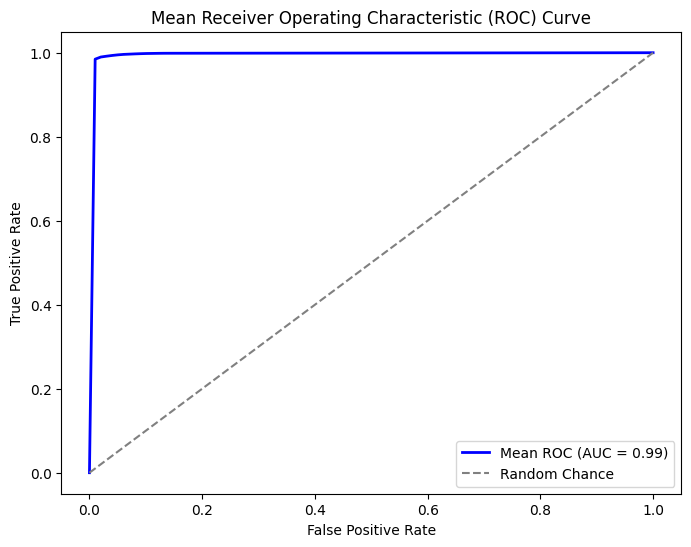

In [ ]:
# Plot the mean ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr_stk, mean_tpr_stk, color='b', label=f'Mean ROC (AUC = {mean_auc_stk:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# meta classifier (XGB)

In [ ]:
accuracy_stk_list = []
roc_auc_scores_stk_list = []
precisions_stk_list = []
recalls_stk_list = []
specificity_stk_list = []


minority_tpr_scores_stk_list = []
majority_tpr_scores_stk_list = []
minority_fpr_scores_stk_list = []
majority_fpr_scores_stk_list = []

mean_fpr_stk = np.linspace(0, 1, 100)
tpr_accumulated_stk = 0


In [ ]:
print(independent_x.columns)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_0', 'gender_1', 'gender_2', 'ever_married_0', 'ever_married_1',
       'work_type_0', 'work_type_1', 'work_type_2', 'work_type_3',
       'work_type_4', 'Residence_type_0', 'smoking_status_0',
       'smoking_status_1', 'smoking_status_2', 'smoking_status_3'],
      dtype='object')


In [ ]:
model_stk_4 = StackingClassifier(estimators=models_2, final_estimator= model_xgb)

Fold 1:


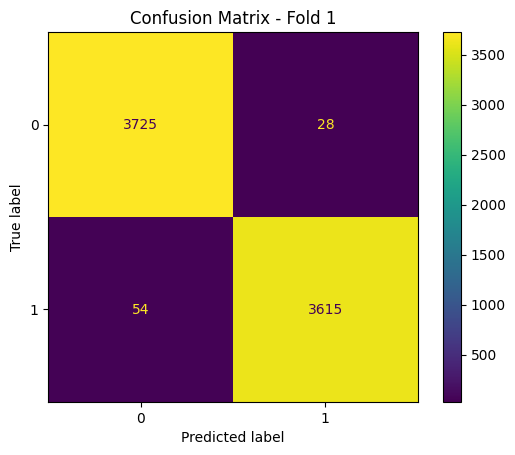

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.01
Fold 2:


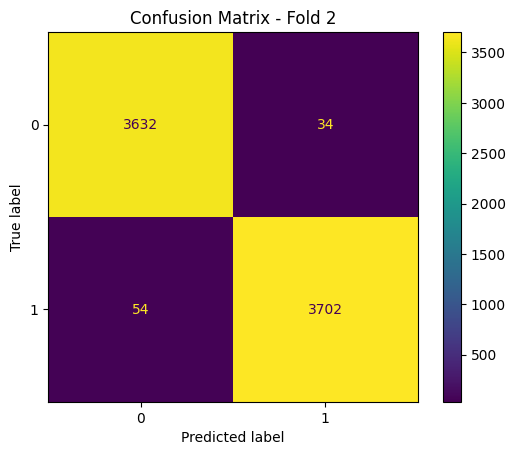

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.01
Fold 3:


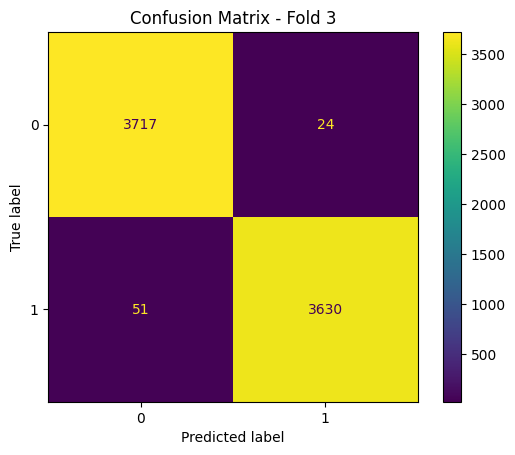

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.01
Fold 4:


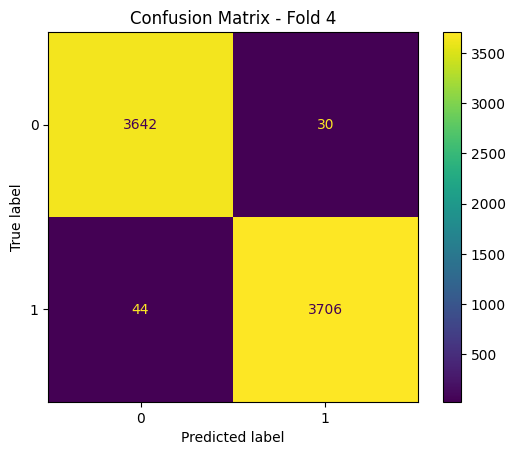

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.01
Fold 5:


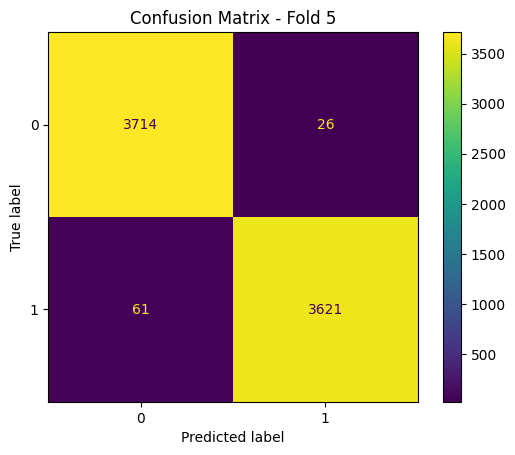

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 6:


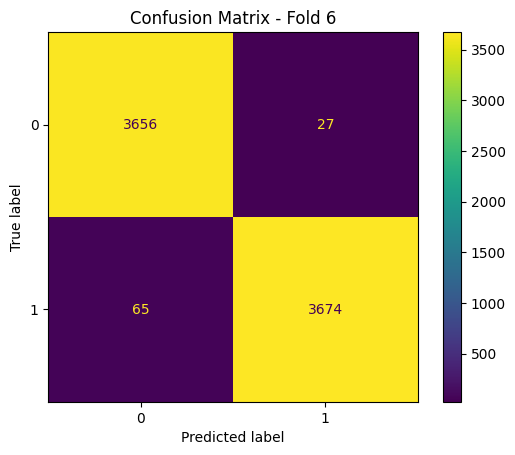

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 7:


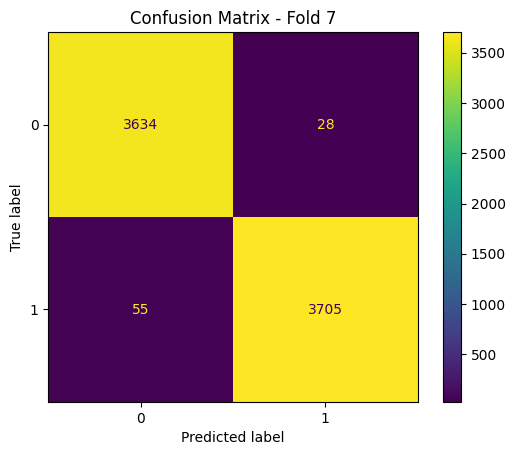

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.01
Majoority TPR: 0.99
Majority FPR: 0.01
Fold 8:


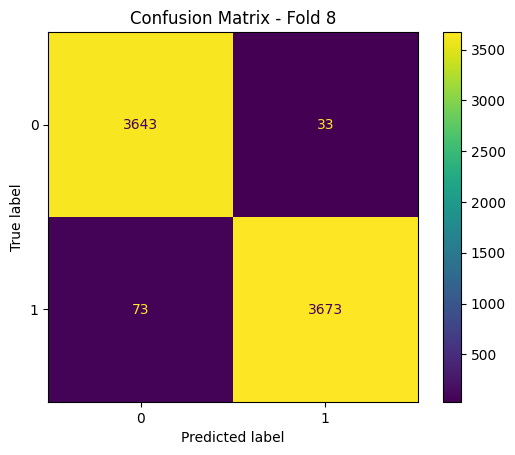

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 9:


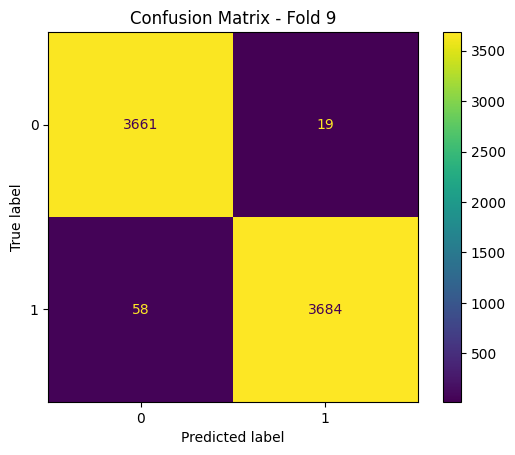

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01
Fold 10:


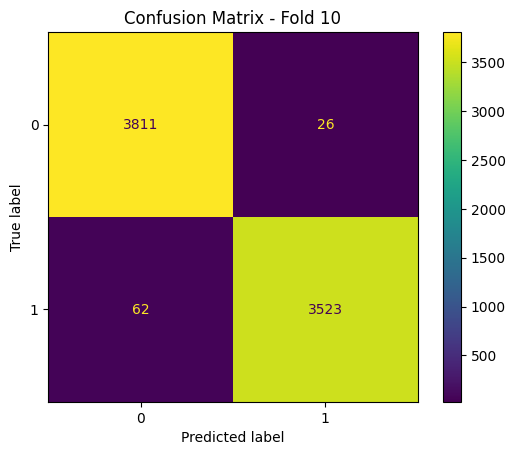

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Specificity: 0.99
AUC: 1.00
Minority TPR: 0.99
Minority FPR: 0.02
Majoority TPR: 0.98
Majority FPR: 0.01


In [ ]:
for i,(train_idx, val_idx) in enumerate(kf.split(independent_x, dependent_y)):
    print(f"Fold {i+1}:")
    X_train_fold, X_val_fold = independent_x.iloc[train_idx], independent_x.iloc[val_idx]
    y_train_fold, y_val_fold = dependent_y.iloc[train_idx], dependent_y.iloc[val_idx]

    model_stk_4.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred_stk = model_stk_4.predict(X_val_fold)

    cm_stk = confusion_matrix(y_val_fold, y_val_pred_stk, labels=model_stk_4.classes_)

    disp_stk = ConfusionMatrixDisplay(confusion_matrix=cm_stk,display_labels=model_stk_4.classes_)

    disp_stk.plot()
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.show()

    TP = cm_stk[1,1]
    TN = cm_stk[0,0]
    FP = cm_stk[0,1]
    FN = cm_stk[1,0]

    accuracy_stk = model_stk_4.score(X_val_fold, y_val_fold)
    precision_stk = precision_score(y_val_fold, y_val_pred_stk)
    recall_stk = recall_score(y_val_fold, y_val_pred_stk)
    specificity_stk = TN / float(TN+FP)
    fpr_stk, tpr_stk, _ = roc_curve(y_val_fold, model_stk_4.predict_proba(X_val_fold)[:, 1])

    # Interpolate the ROC curve at the mean_fpr points
    tpr_accumulated_stk += np.interp(mean_fpr_stk, fpr_stk, tpr_stk)
    tpr_accumulated_stk[0] = 0.0

    minority_tpr_stk = cm_stk[1, 1] / (cm_stk[1, 1] + cm_stk[0, 1])
    majority_tpr_stk = cm_stk[0, 0] / (cm_stk[0, 0] + cm_stk[1, 0])
    minority_fpr_stk = cm_stk[1, 0] / (cm_stk[1, 0] + cm_stk[0, 0])
    majority_fpr_stk = cm_stk[0, 1] / (cm_stk[0, 1] + cm_stk[1, 1])

    print(f"Accuracy: {accuracy_stk:.2f}")
    print(f"Precision: {precision_stk:.2f}")
    print(f"Recall: {recall_stk:.2f}")
    print(f"Specificity: {specificity_stk:.2f}")
    print(f"AUC: {auc(fpr_stk, tpr_stk):.2f}")

    print(f"Minority TPR: {minority_tpr_stk:.2f}")
    print(f"Minority FPR: {minority_fpr_stk:.2f}")
    print(f"Majoority TPR: {majority_tpr_stk:.2f}")
    print(f"Majority FPR: {majority_fpr_stk:.2f}")

    accuracy_stk_list.append(accuracy_stk)
    roc_auc_scores_stk_list.append(auc(fpr_stk, tpr_stk))
    precisions_stk_list.append(precision_stk)
    recalls_stk_list.append(recall_stk)
    specificity_stk_list.append(specificity_stk)

    minority_tpr_scores_stk_list.append(minority_tpr_stk)
    minority_fpr_scores_stk_list.append(minority_fpr_stk)
    majority_tpr_scores_stk_list.append(majority_tpr_stk)
    majority_fpr_scores_stk_list.append(majority_fpr_stk)

In [ ]:
avg_accuracy_stk = np.mean(accuracy_stk_list)
avg_roc_auc_stk = np.mean(roc_auc_scores_stk_list)
avg_precision_stk = np.mean(precisions_stk_list)
avg_recall_stk = np.mean(recalls_stk_list)
avg_specificity_stk = np.mean(specificity_stk_list)

avg_minority_tpr_stk = np.mean(minority_tpr_scores_stk_list)
avg_minority_fpr_stk = np.mean(minority_fpr_scores_stk_list)
avg_majority_tpr_stk = np.mean(majority_tpr_scores_stk_list)
abg_majority_fpr_stk = np.mean(majority_fpr_scores_stk_list)

In [ ]:
print("Average Accuracy:", avg_accuracy_stk)
print("Average ROC AUC Score:", avg_roc_auc_stk)
print("Average Precision Score:", avg_precision_stk)
print("Average Recall Score:", avg_recall_stk)
print("Average Specificity:", avg_specificity_stk)

print("Average Minority TPR:", avg_minority_tpr_stk)
print("Average Minority FPR:", avg_minority_fpr_stk)
print("Average Majority TPR:", avg_majority_tpr_stk)
print("Average Majority FPR:", abg_majority_fpr_stk)

Average Accuracy: 0.9884397736459176
Average ROC AUC Score: 0.9991355383449239
Average Precision Score: 0.9921014659325185
Average Recall Score: 0.9847269487683052
Average Specificity: 0.9921543256129919
Average Minority TPR: 0.9921014659325185
Average Minority FPR: 0.015172280315641246
Average Majority TPR: 0.9848277196843588
Average Majority FPR: 0.007898534067481514


In [ ]:
# Calculate the mean true positive rate
mean_tpr_stk = tpr_accumulated_stk / kf.get_n_splits()

# Calculate the AUC for the mean ROC curve
mean_auc_stk = auc(mean_fpr_stk, mean_tpr_stk)

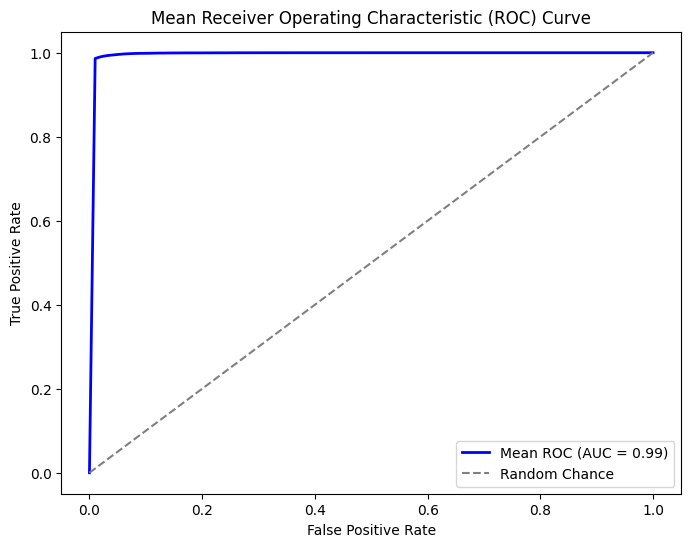

In [ ]:
# Plot the mean ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr_stk, mean_tpr_stk, color='b', label=f'Mean ROC (AUC = {mean_auc_stk:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Permutation Feature Importance Using Stacking (meta = XGBoost)

In [ ]:
model_stk_5 = StackingClassifier(estimators=models_2, final_estimator= model_xgb)

In [ ]:
model_stk_5.fit(X_train, y_train)

StackingClassifier(estimators=[('DecisionTree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       min_samples_leaf=4,
                                                       min_samples_split=10,
                                                       random_state=42)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              ev...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=5, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=300, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...))

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model_stk_5, X_test, y_test, n_repeats=10, random_state=42)

In [ ]:
# Get feature names
feature_names = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_0', 'gender_1', 'gender_2', 'ever_married_0', 'ever_married_1',
       'work_type_0', 'work_type_1', 'work_type_2', 'work_type_3',
       'work_type_4', 'Residence_type_0', 'smoking_status_0',
       'smoking_status_1', 'smoking_status_2', 'smoking_status_3']
print(feature_names)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_0', 'gender_1', 'gender_2', 'ever_married_0', 'ever_married_1', 'work_type_0', 'work_type_1', 'work_type_2', 'work_type_3', 'work_type_4', 'Residence_type_0', 'smoking_status_0', 'smoking_status_1', 'smoking_status_2', 'smoking_status_3']


In [ ]:
# Create a dictionary to store feature importance scores with feature names
feature_importance_scores = {feature_names[i]: result.importances_mean[i] for i in range(len(feature_names))}

In [ ]:
# Sort features based on importance scores
sorted_feature_importance = dict(sorted(feature_importance_scores.items(), key=lambda item: item[1], reverse=True))

In [ ]:
# Print feature importance scores
print("Permutation Importance Scores:")
for feature, importance_score in sorted_feature_importance.items():
    print(f"{feature}: {importance_score:.4f}")

Permutation Importance Scores:
age: 0.4235
bmi: 0.0570
avg_glucose_level: 0.0421
ever_married_0: 0.0286
Residence_type_0: 0.0248
ever_married_1: 0.0144
hypertension: 0.0097
work_type_0: 0.0095
work_type_1: 0.0094
smoking_status_1: 0.0082
gender_0: 0.0074
smoking_status_3: 0.0067
smoking_status_0: 0.0062
smoking_status_2: 0.0061
gender_1: 0.0050
heart_disease: 0.0048
work_type_2: 0.0042
work_type_3: 0.0005
gender_2: 0.0000
work_type_4: 0.0000


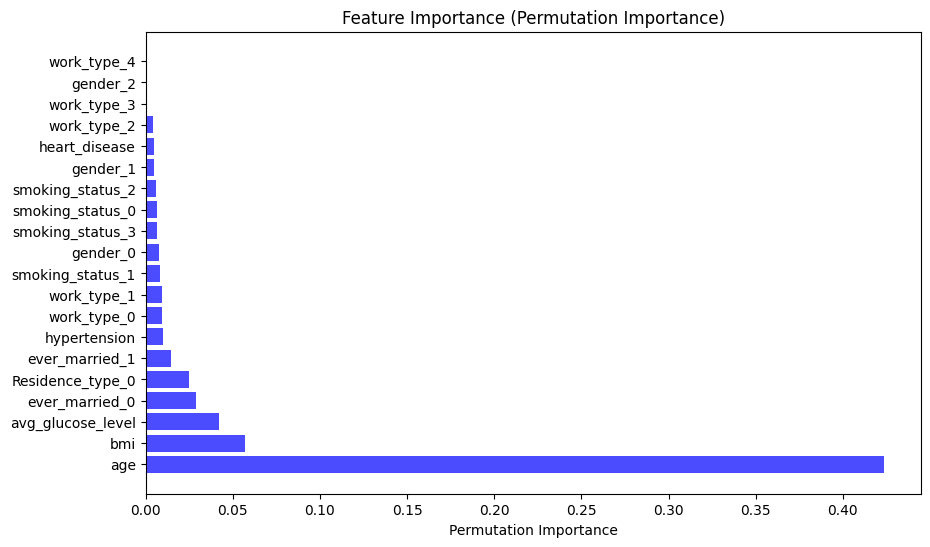

In [ ]:
# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance.values(), align='center', alpha=0.7, color='b')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_importance.keys())
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation Importance)')
plt.show()

# LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=cf9d8fb7b9b625d1d1b56818c4129f60aa619e0b55ecb37bf8c0be1cc1846b32
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
test_sample = X_test.iloc[num,:]

In [ ]:
import lime
from lime import lime_tabular

RANDOM_STATE = 123
X_explain = X_test

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data = X_train.values,
    feature_names = X_train.columns.values,
    class_names = ['Non-Stroke', 'Stroke'],
    mode = 'classification',
    verbose = True,
    random_state=RANDOM_STATE
)


In [ ]:
lime_exp = lime_explainer.explain_instance(data_row = test_sample,predict_fn = model_stk_5.predict_proba,
                                 num_features=20)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.4932292867798273
Prediction_local [0.78272917]
Right: 0.9998517


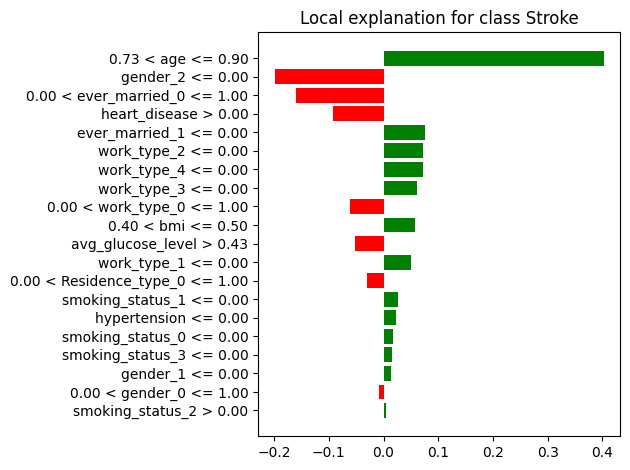

In [ ]:
plt = lime_exp.as_pyplot_figure()
plt.tight_layout()

In [ ]:
coefs = pd.DataFrame(lime_exp.as_list())[1].sum()
print('Sum of coefficients and intercept = ',coefs+0.5)
pd.DataFrame(lime_exp.as_list())

Sum of coefficients and intercept =  0.7894998825572925


0         1
0                0.73 < age <= 0.90  0.401922
1                  gender_2 <= 0.00 -0.199048
2     0.00 < ever_married_0 <= 1.00 -0.159176
3              heart_disease > 0.00 -0.092001
4            ever_married_1 <= 0.00  0.075750
5               work_type_2 <= 0.00  0.072257
6               work_type_4 <= 0.00  0.071684
7               work_type_3 <= 0.00  0.061858
8        0.00 < work_type_0 <= 1.00 -0.061756
9                0.40 < bmi <= 0.50  0.056623
10         avg_glucose_level > 0.43 -0.052788
11              work_type_1 <= 0.00  0.049629
12  0.00 < Residence_type_0 <= 1.00 -0.030400
13         smoking_status_1 <= 0.00  0.026636
14             hypertension <= 0.00  0.023174
15         smoking_status_0 <= 0.00  0.017999
16         smoking_status_3 <= 0.00  0.015953
17                 gender_1 <= 0.00  0.014440
18          0.00 < gender_0 <= 1.00 -0.008031
19          smoking_status_2 > 0.00  0.004777

In [ ]:
lime_exp.show_in_notebook(show_table=True, show_all=False)